<a href="https://colab.research.google.com/github/AanchalKankrecha/Credit_Card_Default_Prediction-Classification-/blob/main/Classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit card Default prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df=pd.read_excel('/content/drive/MyDrive/Capstone_project(3)/ML_classification_project/Dataset of default of credit card clients.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(30000, 25)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


### What did you know about your dataset?

Dataset contains 30000 records of 24 features.
None of the record is duplicate.
None of the records contains null values.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

### Variables Description 
ID: ID of each client, categorical variable

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender, categorical variable (1=male, 2=female)

EDUCATION: level of education, categorical variable (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status, categorical variable (1=married, 2=single, 3=others)

AGE: Age in years, numerical variable
The following attributes contains information about the delay of the past payment referred to a specific month:

PAY_0: Repayment status in September 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August 2005 (same scale as before)

PAY_3: Repayment status in July 2005 (same scale as before)

PAY_4: Repayment status in June 2005 (same scale as before)

PAY_5: Repayment status in May 2005 (same scale as before)

PAY_6: Repayment status in April 2005 (same scale as before)

Other variables instead consider the information related to the amount of bill statement (i.e. a monthly report that credit card companies issue to credit card holders in a specific month):

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

The following variables instead consider the amount of previous payment in a specific month:

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

The last variable is the one to be predicted:

default.payment.next.month: indicate whether the credit card holders are defaulters or non-defaulters (1=yes, 0=no)

**Inference**
- There are around 30000 distinct credit card clients.
- The average value of credit card Limits is Rs 1,67,484.
- The Limited Balance has a high Standard deviation as the meadian value is Rs 1,40,000 and the extreme values as Rs 10,00,000.
- Here the average is about 35 and meadian is 28 with a standard deviation of 9.2. This difference is explained by some very old people in the data set as given that the maximum age is 79.
- Bill Amount and Pay Amount also shows us that there some people with extremely high bill amount which may be because for the higher Credit Limit or because of the pending dues added up. 
- Bill amount for all the months, the mean is around 40,000 to 50,000 with some extreme amount in bill amount 3 of Rs 16,64,089.
- Pay amount for all the months, the mean is around Rs 4800 to Rs 5800, with some extreme values such as Rs 16,64,089.
- As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
catcol=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default payment next month']
unique_df=pd.DataFrame(columns=['c_name','unique','num_unique'])
for i in catcol:
  unique_df=unique_df.append({'c_name':i,'unique':df[i].unique(),'num_unique':df[i].nunique()},ignore_index=True)
unique_df  

c_name                               unique num_unique
0                         SEX                               [2, 1]          2
1                   EDUCATION                [2, 1, 3, 5, 4, 6, 0]          7
2                    MARRIAGE                         [1, 2, 3, 0]          4
3                       PAY_0  [2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6]         11
4                       PAY_2  [2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8]         11
5                       PAY_3  [-1, 0, 2, -2, 3, 4, 6, 7, 1, 5, 8]         11
6                       PAY_4  [-1, 0, -2, 2, 3, 4, 5, 7, 6, 1, 8]         11
7                       PAY_5     [-2, 0, -1, 2, 3, 5, 4, 7, 8, 6]         10
8                       PAY_6     [-2, 2, 0, -1, 3, 6, 4, 7, 8, 5]         10
9  default payment next month                               [1, 0]          2

In [ ]:
cat_col=unique_df['c_name'].to_list()

## 3. ***Data Wrangling***

### Data Wrangling Code

Univariate – When we analyze one variable at a time, it is called univariate data analysis. This analysis aims to describe the variable in question and find patterns that exist within it. Example: height of students

Bivariate – Bivariate data involves two different variables. The analysis of this type of data deals with causes and relationships. The investigation determines the relationship between the two variables, where one of the variables is the target variable. Example: temperature and ice cream sales in the summer season.

Multivariate – Analyzing three or more variables together is categorized under multivariate data analysis. It is similar to a bivariate but contains more than one dependent variable.
Example: data for house price prediction

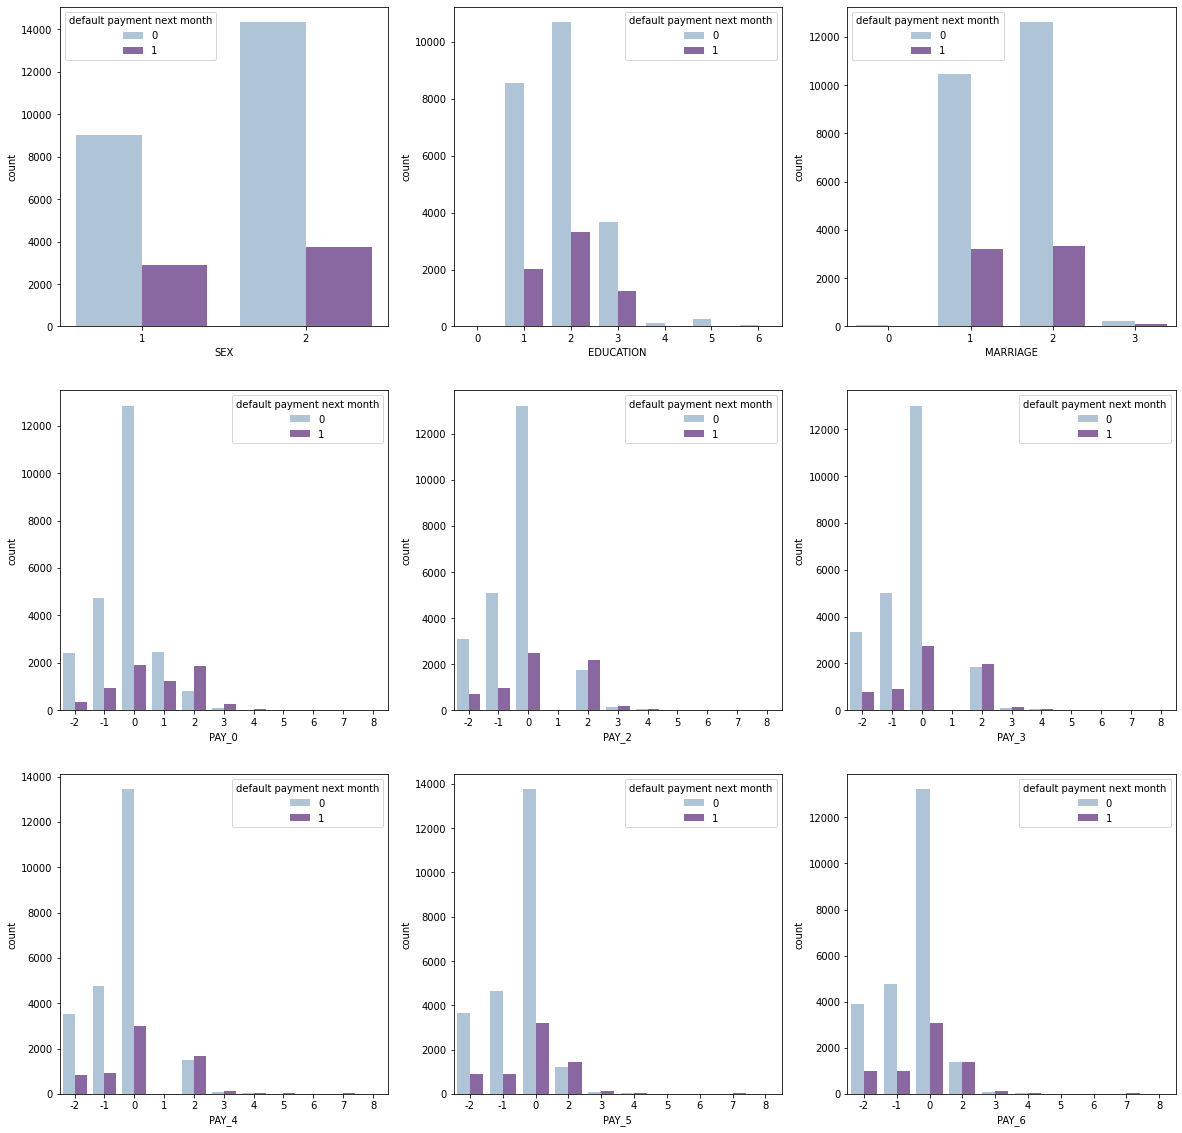

In [ ]:
# Write your code to make your dataset analysis ready.
cat_features = df[cat_col]
fig , ax = plt.subplots(3,3,figsize = (20,20))     # set up 2 x 2 frame count plot with figsize 10 x 10
for i , subplots in zip (cat_features, ax.flatten()):  
  sns.countplot(x=cat_features[i],data=df,hue = df['default payment next month'],ax = subplots, palette = 'BuPu')
plt.show()

**Inferences**

1.SEX: 1 represents Male while 2 represents female and 0 represents non defaulter while 1 represents defaulter. From the above countplot we can infer that females have high count for both defaulter and non defaulter compared to males.

2.Education: Highest no. of defaulters are from class 2 i.e from university students and defined range for education is (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) but from the count plot we can see that some records take value as 0,which needs to be changed to 6 as unknown.

3.MARRIAGE:Marital status seems to be less effective in deciding defaulters as single and married people has approximately same no. of defaulters.Range for this categorical variable is set as (1=married, 2=single, 3=others) but some of the records take value as 0,therefore changing it to 3.

4.PAY(Repayment status):For all the payments column highest no. of records take value of pay=0 for both defaulters and non defaulters for months from April to September.As some the records take value as -2 which may means before payment but is out of the defined range(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) so we can replace it by -1 which is for appropriate payment.

In [ ]:
df[df['EDUCATION']==0].T

3769    5945    6876    14631   15107   16881  \
ID                            3770    5946    6877   14632   15108   16882   
LIMIT_BAL                   290000  270000  360000  350000  210000  100000   
SEX                              2       1       1       2       1       1   
EDUCATION                        0       0       0       0       0       0   
MARRIAGE                         2       2       2       2       2       2   
AGE                             38      39      30      53      45      37   
PAY_0                            1       1       0      -1      -2       0   
PAY_2                           -1      -1       0      -1      -2       0   
PAY_3                           -1      -1      -1      -1      -2      -2   
PAY_4                           -1      -1       0      -1      -2      -2   
PAY_5                           -1      -1       0      -1      -2      -2   
PAY_6                           -1      -2      -1      -1      -2      -2   
BILL_AMT1                        0       0   40250    5095    2563    7642   
BILL_AMT2                     1437   10193   23022    4815    5854       0   
BILL_AMT3                     3070   69553   12272   61044    1032       0   
BILL_AMT4                     1406   18607   34345   22611     788       0   
BILL_AMT5                     2196       0   36777    1385    3499       0   
BILL_AMT6                     1481       0      30    6043    3372       0   
PAY_AMT1                      1437   10193   23000    4840    5854       0   
PAY_AMT2                      3078   70213   12280   61349    1032       0   
PAY_AMT3                      1406   19008   25007   22687     788       0   
PAY_AMT4                      2196     399   25008    1389    3565       0   
PAY_AMT5                      1481       0    1767    6058    3372       0   
PAY_AMT6                         0       0    3300    1153   15381       0   
default payment next month       0       0       0       0       0       0   

                             16896   17414  19920   20030   23234   24137  \
ID                           16897   17415  19921   20031   23235   24138   
LIMIT_BAL                   200000  230000  50000  200000  220000  150000   
SEX                              1       2      2       2       2       1   
EDUCATION                        0       0      0       0       0       0   
MARRIAGE                         2       2      1       2       1       2   
AGE                             40      47     40      30      35      28   
PAY_0                            1      -1      0      -1      -2       0   
PAY_2                           -2      -1      0      -1      -2       0   
PAY_3                           -1      -1      0       2      -2       0   
PAY_4                           -1       2      0      -1      -2       0   
PAY_5                           -1      -1      0      -1      -2      -1   
PAY_6                           -2      -1      0      -1      -2      -1   
BILL_AMT1                        0    8394  44749   17160       0   15855   
BILL_AMT2                        0    5743  46229    7289     319   27241   
BILL_AMT3                      200    1336  46798    2868   10567   20818   
BILL_AMT4                     1000     255  47647    9470     319    9864   
BILL_AMT5                        0    5425  40500    5816     319    3957   
BILL_AMT6                        0    4838  41921    7809     319    2205   
PAY_AMT1                         0    5743   2229    2880     319   18056   
PAY_AMT2                       200    1598   2298       0   10567    4065   
PAY_AMT3                      1000       0   2100    9470     319    1058   
PAY_AMT4                         0    5425   2500    5834     319    3976   
PAY_AMT5                         0    4838   1921    7809     319    2216   
PAY_AMT6                         0    3840   8432    2886    2420       0   
default payment next month       0       0      0       0       0       0  

In [ ]:
df[df['MARRIAGE']==0]

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
218      219     110000    2          3         0   31      0      0      0   
809      810     160000    2          2         0   37      0      0      0   
820      821     200000    2          3         0   51     -1     -1     -1   
1019    1020     180000    2          3         0   45     -1     -1     -2   
1443    1444     200000    1          3         0   51     -1     -1     -1   
2146    2147     150000    2          3         0   55     -1     -1     -1   
2554    2555     220000    2          1         0   33     -1     -1     -1   
3056    3057     200000    1          3         0   36     -2     -2     -2   
4470    4471      70000    1          3         0   35      2      2      2   
5005    5006      90000    2          3         0   24     -2     -2     -2   
5345    5346      50000    2          2         0   28      1      2      0   
6389    6390      10000    1          3         0   40      0      0      0   
7940    7941      50000    1          3         0   50      0      0      0   
7955    7956      50000    2          3         0   27      2      0     -1   
8886    8887      70000    1          3         0   26      1      2      2   
9088    9089      50000    1          3         0   50      0      0      0   
9973    9974      80000    2          3         0   34      0      0      0   
10208  10209      50000    2          1         0   45     -1     -1     -2   
11752  11753     290000    2          2         0   49      0      0      0   
11925  11926     140000    1          3         0   47      0      0      0   
12050  12051      80000    2          3         0   37     -2     -2     -2   
12078  12079      30000    2          3         0   46      1      2      2   
12732  12733      70000    2          3         0   34      1      2      2   
13825  13826     120000    2          3         0   41      0      0     -2   
16581  16582      20000    1          3         0   29      5      4      3   
17285  17286     120000    2          3         0   47     -1      0      0   
17529  17530      80000    2          3         0   41      0      0      0   
17576  17577     110000    2          3         0   31      0      0      0   
18306  18307     230000    2          3         0   30     -1     -1     -1   
18535  18536     250000    2          3         0   26      0      0      0   
18948  18949      50000    2          3         0   32     -1     -1      2   
19342  19343     200000    2          3         0   31      1     -2     -2   
19386  19387      30000    2          3         0   30      0      0      2   
20119  20120     200000    2          3         0   45      0      0      0   
20449  20450     120000    1          3         0   26      0      0     -1   
21559  21560      20000    2          3         0   23      0      0      0   
22590  22591     160000    2          2         0   41      0      0      0   
23029  23030      80000    2          3         0   37     -2     -2     -2   
23103  23104      90000    2          3         0   42      0      0      2   
23135  23136      20000    2          3         0   35      0     -1      2   
23360  23361     240000    2          3         0   37     -1     -1     -1   
24216  24217     180000    1          3         0   27     -2     -2     -2   
24443  24444     300000    1          1         0   37     -1     -1     -1   
24721  24722     360000    1          2         0   38     -1     -1     -1   
24984  24985      50000    1          3         0   39      0      0      0   
25308  25309     170000    2          2         0   24     -1      0      0   
25702  25703     200000    2          3         0   45     -2     -2     -2   
26250  26251     210000    2          1         0   31     -1     -1     -1   
28457  28458     180000    2          3         0   36     -1     -1     -1   
28602  28603     200000    2          3         0   37      

In [ ]:
df.loc[(df['PAY_0']==df['PAY_3']) & (df['PAY_2']==df['PAY_0']) & (df['PAY_4']==df['PAY_0']) & (df['PAY_5']==df['PAY_0']) & (df['PAY_5']==df['PAY_0']) & (df['PAY_0']==-2)]

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
23        24     450000    2          1         1   40     -2     -2     -2   
33        34     500000    2          2         1   54     -2     -2     -2   
34        35     500000    1          1         1   58     -2     -2     -2   
45        46     210000    1          1         2   29     -2     -2     -2   
52        53     310000    2          2         1   49     -2     -2     -2   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29937  29938     320000    1          1         1   44     -2     -2     -2   
29961  29962     260000    1          1         2   33     -2     -2     -2   
29979  29980     180000    1          1         1   32     -2     -2     -2   
29983  29984      20000    1          2         1   44     -2     -2     -2   
29985  29986     240000    1          1         2   30     -2     -2     -2   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
23        -2  ...        560          0          0     19428      1473   
33        -2  ...       7521      71439       8981      4152     22827   
34        -2  ...       3180          0       5293      5006     31178   
45        -2  ...          0          0          0         0         0   
52        -2  ...      11185       3544        464      7875      7600   
...      ...  ...        ...        ...        ...       ...       ...   
29937     -2  ...       2975       2029        888      6818     13482   
29961     -2  ...       1368        101        955       263         0   
29979     -2  ...          0          0          0         0         0   
29983     -2  ...       2882       9235       1719      2890      2720   
29985     -2  ...          0          0          0         0         0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
23          560         0         0      1128                           1  
33         7521     71439       981     51582                           0  
34         3180         0      5293       768                           0  
45            0         0         0         0                           1  
52        11185      3544       464         0                           0  
...         ...       ...       ...       ...                         ...  
29937      2975      2029       888      1332                           0  
29961      1368       101       955         0                           0  
29979         0         0         0         0                           0  
29983      2890      9263      1824      1701                           0  
29985         0         0         0         0                           0  

[2197 rows x 25 columns]

Thus, there is no mess-up in the data which imply dropping of those records.

**Wrangling on categorical columns**

In [4]:
#Education column-replacing value 0 by 6
df['EDUCATION']=df['EDUCATION'].replace(0,6)
#Marriage column- replacing value 0 by 3
df['MARRIAGE']=df['MARRIAGE'].replace(0,3)
#Payment column-replacing column PAY_0 BY PAY_1 and replacing payment value -2 to -1
payment=['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df.rename(columns={'PAY_0':'PAY_1'},inplace=True)
for i in payment:
  df[i]=df[i].replace(-2,-1)                                                    

In [5]:
_col=['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
cont_col=df[_col]

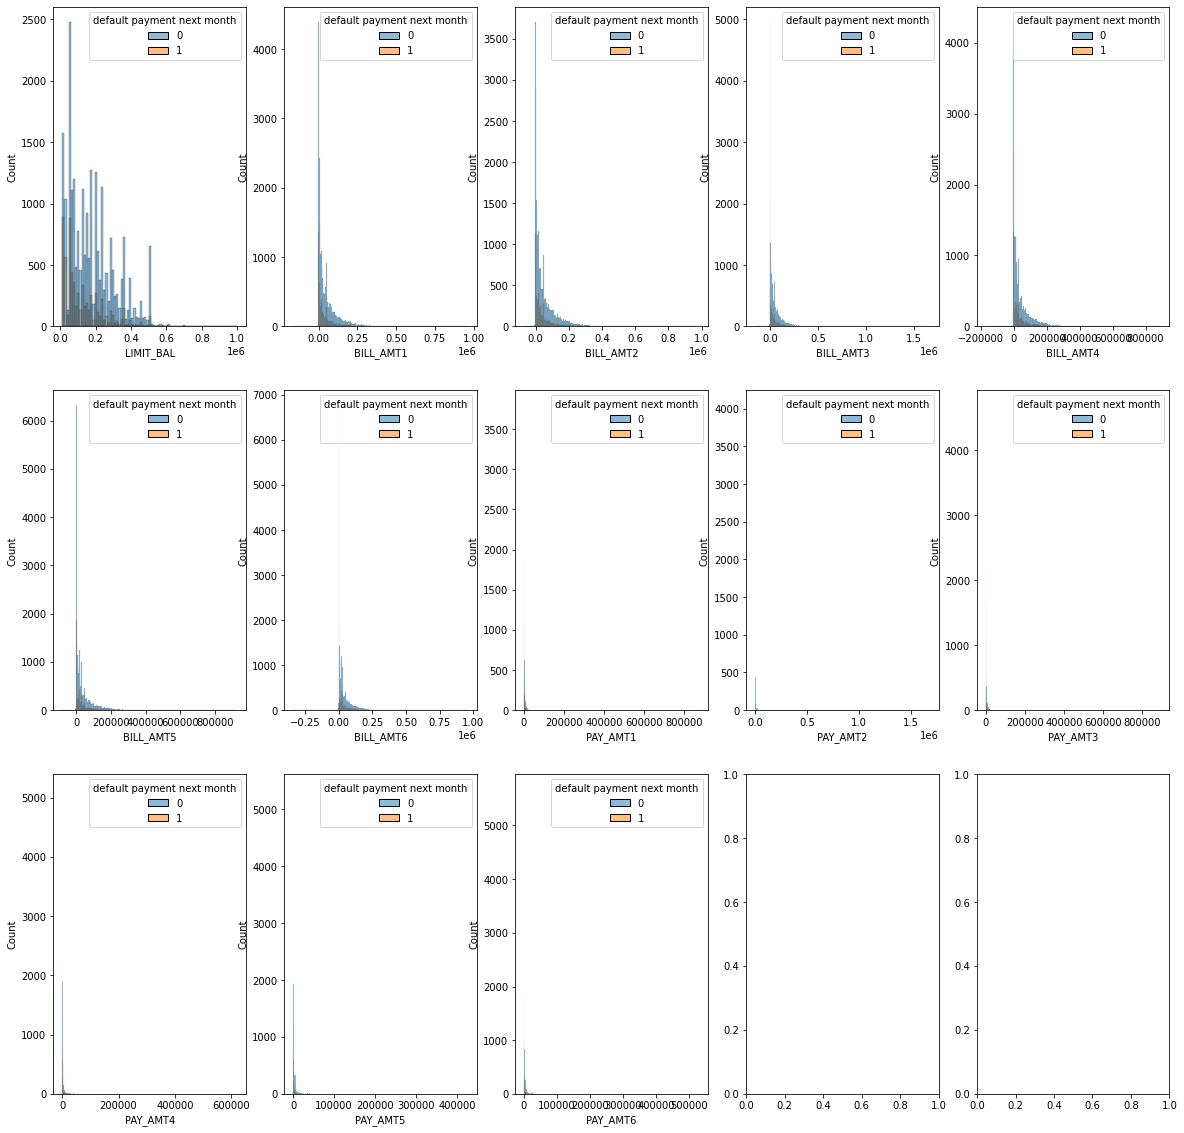

In [ ]:
fig , ax = plt.subplots(3,5,figsize = (20,20))     # set up 2 x 2 frame count plot with figsize 10 x 10
for i , subplots in zip (cont_col, ax.flatten()):  
  sns.histplot(x=cont_col[i],data=df,hue = df['default payment next month'],ax = subplots)
plt.show()

<Axes: xlabel='default payment next month', ylabel='count'>

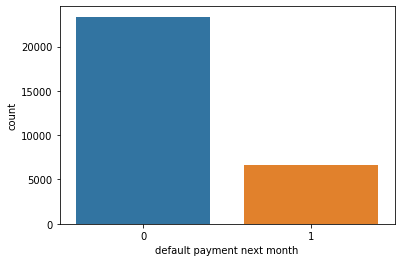

In [ ]:
sns.countplot(x='default payment next month',data=df)

As the number of defaulter people is around 25000 while non-defaulter people are around 5000 i.e the ratio is 5:1 which means that the dataset is imbalanced.

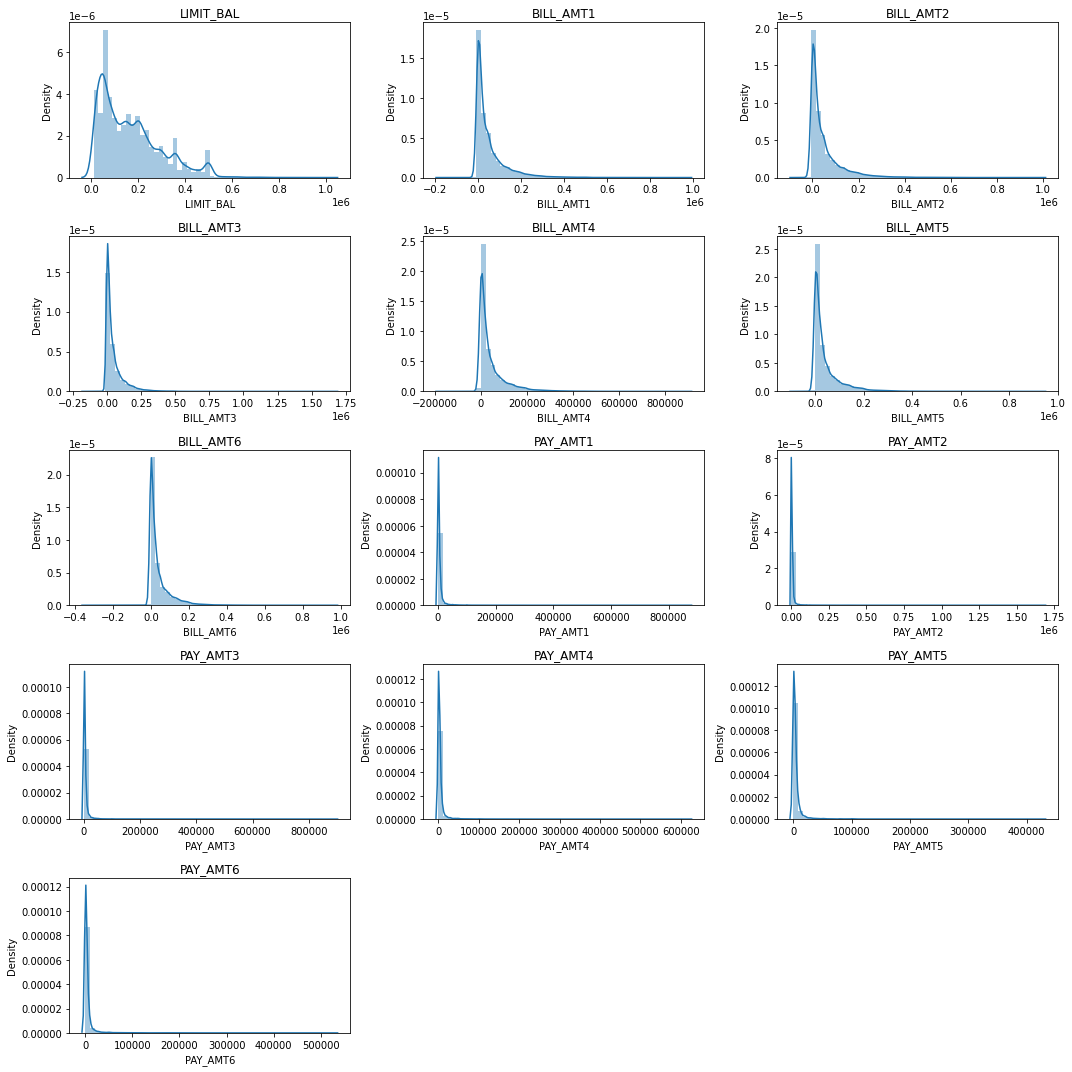

In [ ]:
n=1
plt.figure(figsize=(15,15))
for col in cont_col:
   plt.subplot(5,3,n)
   n+=1
   sns.distplot(df[col])
   plt.title(col)
   plt.tight_layout()

In [ ]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [ ]:
_col_=df.describe().columns
_col_

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### What all manipulations have you done and insights you found?

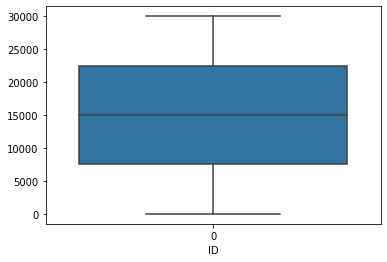

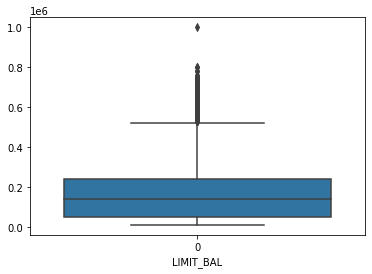

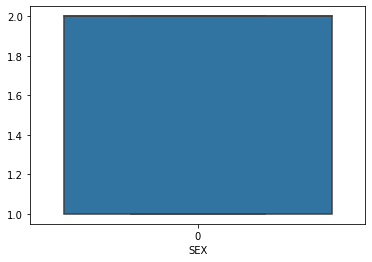

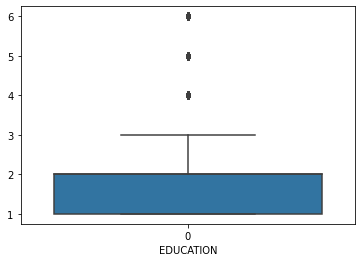

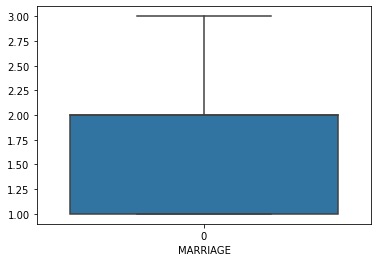

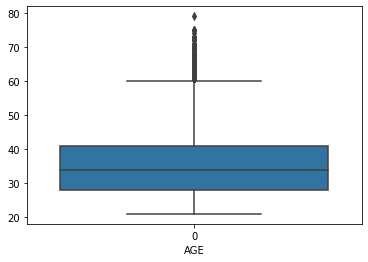

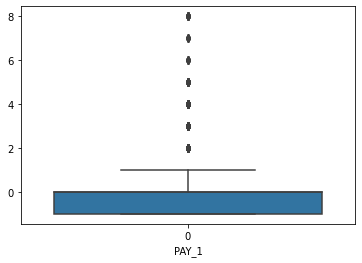

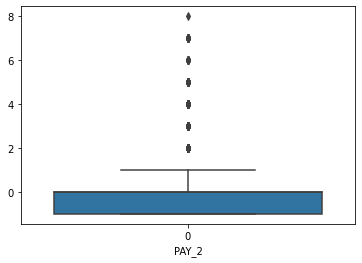

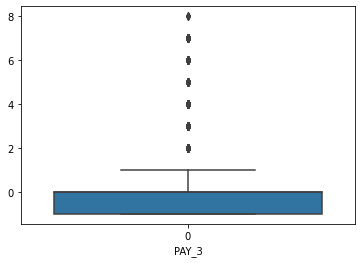

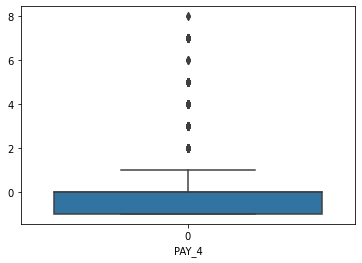

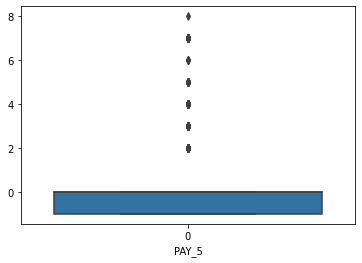

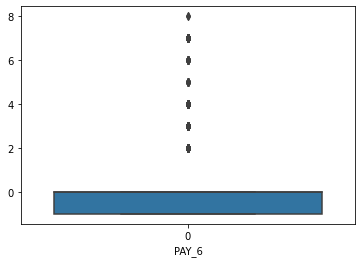

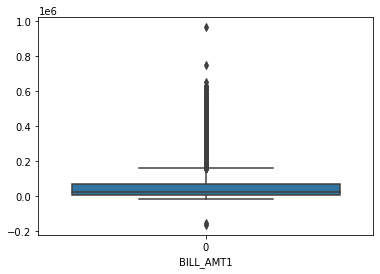

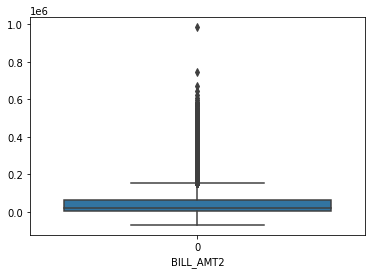

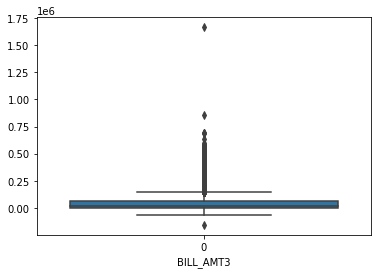

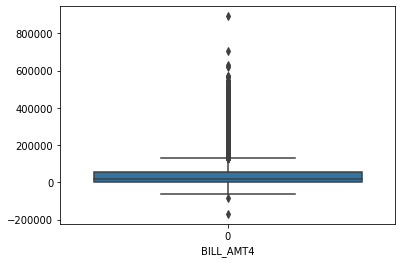

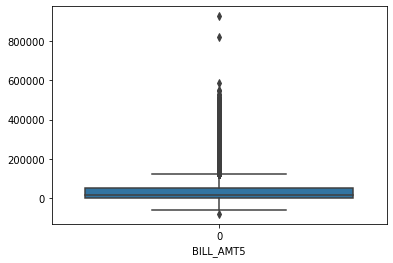

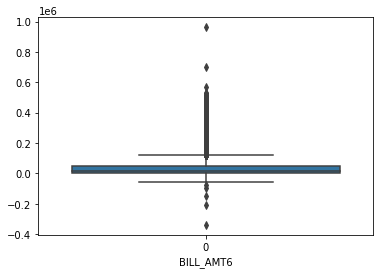

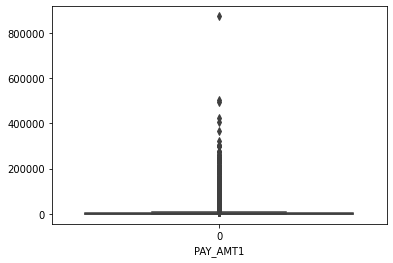

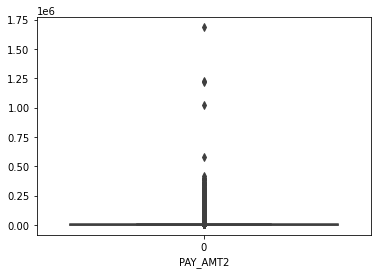

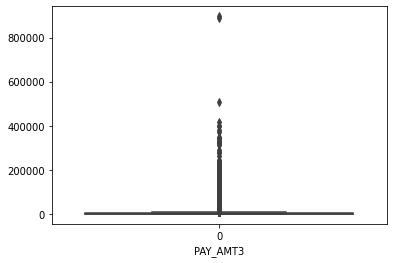

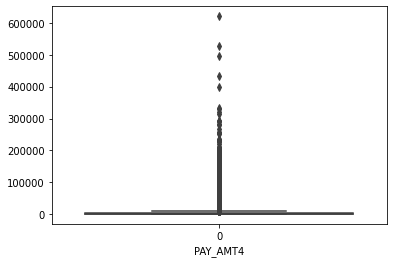

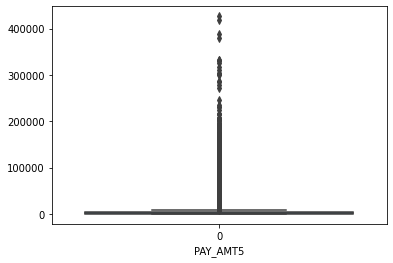

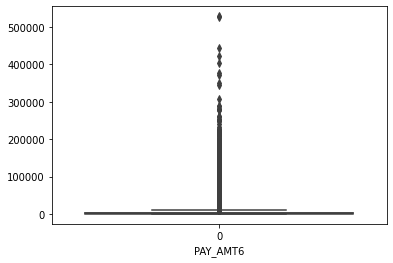

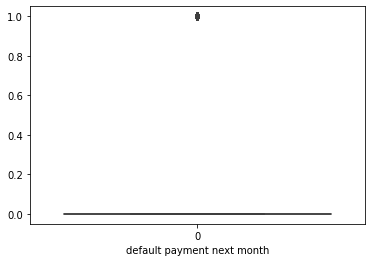

In [ ]:
for i in _col_:
 plot=sns.boxplot(df[i])
 plot.set(xlabel=i)
 plt.show()

In [ ]:
#defining function to detect outlier
def check_outliers(start,end,step,column):
  for i in range(start,end,step):
    a = column.values
    a=np.sort(a)
    print('{} percentile value is {}'.format(i,int(column.quantile(i/100))))
  print('{} percentile value is {}'.format(100,a[-1]))

In [ ]:
for i in _col_:
 print(f'For detecting outliers in column {i}')
 check_outliers(90,100,1,df[i])
 print('\n')
 

For detecting outliers in column ID
90 percentile value is 27000
91 percentile value is 27300
92 percentile value is 27600
93 percentile value is 27900
94 percentile value is 28200
95 percentile value is 28500
96 percentile value is 28800
97 percentile value is 29100
98 percentile value is 29400
99 percentile value is 29700
100 percentile value is 30000


For detecting outliers in column LIMIT_BAL
90 percentile value is 360000
91 percentile value is 360000
92 percentile value is 380000
93 percentile value is 390000
94 percentile value is 410000
95 percentile value is 430000
96 percentile value is 460000
97 percentile value is 500000
98 percentile value is 500000
99 percentile value is 500000
100 percentile value is 1000000


For detecting outliers in column SEX
90 percentile value is 2
91 percentile value is 2
92 percentile value is 2
93 percentile value is 2
94 percentile value is 2
95 percentile value is 2
96 percentile value is 2
97 percentile value is 2
98 percentile value is 2
99 

In [ ]:
df[df['LIMIT_BAL']>800000]

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
2197  2198    1000000    2          1         1   47      0      0      0   

      PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
2197     -1  ...     891586     927171     961664     50784     50723   

      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
2197    896040     50000     50000     50256                           0  

[1 rows x 25 columns]

As only 1 record has value of limit balance of 10lakh which seems to be an extreme point so considering it as an outlies and dropping this record.

In [6]:
df.drop(df[df.LIMIT_BAL>800000].index,inplace=True)

For BILL_AMT only 1% of the values are greater than 8lakh approximately and the remaining 99% values is approximately less than 2 lakh.

For PAY_AMT only 1% of the values are greater than 4 lakh and the remaining 99% values is approximately less than 65000 

So these values can be considered as outliers but we know the fact that least no. of people have very high amounts so does only 1% have in our dataset.



In [ ]:
# Bill Statement description
df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

BILL_AMT1      BILL_AMT2     BILL_AMT3      BILL_AMT4  \
count   29999.000000   29999.000000  2.999900e+04   29999.000000   
mean    51192.886963   49147.915731  4.699689e+04   43234.670589   
std     73448.041431   70970.035550  6.929328e+04   64147.202166   
min   -165580.000000  -69777.000000 -1.572640e+05 -170000.000000   
25%      3558.500000    2984.500000  2.665500e+03    2326.500000   
50%     22381.000000   21197.000000  2.008800e+04   19052.000000   
75%     67089.000000   64002.500000  6.016350e+04   54494.500000   
max    746814.000000  743970.000000  1.664089e+06  706864.000000   

           BILL_AMT5      BILL_AMT6  
count   29999.000000   29999.000000  
mean    40281.837995   38840.999633  
std     60582.154255   59316.290057  
min    -81334.000000 -339603.000000  
25%      1763.000000    1256.000000  
50%     18104.000000   17068.000000  
75%     50182.500000   49183.500000  
max    823540.000000  699944.000000

In [ ]:
df[df['BILL_AMT1']>700000]

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
27557  27558     730000    1          3         1   56      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
27557      0  ...      86927      66111      38491     20500     16500   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
27557      3000      2000      2000      5000                           0  

[1 rows x 25 columns]

In [7]:
df.drop(df[df.BILL_AMT1>700000].index,inplace=True)
df.drop(df[df.BILL_AMT2>700000].index,inplace=True)
df.drop(df[df.BILL_AMT3>1000000].index,inplace=True)
df.drop(df[df.BILL_AMT4>700000].index,inplace=True)
df.drop(df[df.BILL_AMT5>700000].index,inplace=True)

In [ ]:
df[df.BILL_AMT6>700000]

Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default payment next month]
Index: []

[0 rows x 25 columns]

In [ ]:
# Previous Payment Description
df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe()

PAY_AMT1      PAY_AMT2       PAY_AMT3       PAY_AMT4  \
count   29994.000000  2.999400e+04   29994.000000   29994.000000   
mean     5659.868340  5.861492e+03    5190.657098    4821.038408   
std     16561.679396  2.090361e+04   16826.366692   15656.115906   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1000.000000  8.322500e+02     390.000000     296.000000   
50%      2100.000000  2.009000e+03    1800.000000    1500.000000   
75%      5006.000000  5.000000e+03    4502.750000    4012.000000   
max    873552.000000  1.227082e+06  889043.000000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   29994.000000   29994.000000  
mean     4782.456125    5212.722645  
std     15118.504720   17776.642655  
min         0.000000       0.000000  
25%       251.000000     117.250000  
50%      1500.000000    1500.000000  
75%      4029.750000    4000.000000  
max    426529.000000  528666.000000

In [ ]:
df[df.PAY_AMT1>700000]

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
28716  28717     340000    2          1         3   42     -1     -1     -1   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
28716     -1  ...     205931     265431     270237    873552   1215471   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
28716    889043    621000     20000    145000                           0  

[1 rows x 25 columns]

In [8]:
df.drop(df[df.PAY_AMT1>700000].index,inplace=True)
df.drop(df[df.PAY_AMT2>700000].index,inplace=True)
df.drop(df[df.PAY_AMT4>500000].index,inplace=True)
df.drop(df[df.PAY_AMT5>400000].index,inplace=True)
df.drop(df[df.PAY_AMT6>500000].index,inplace=True)

In [ ]:
df[df.PAY_AMT6>500000]

Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default payment next month]
Index: []

[0 rows x 25 columns]

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

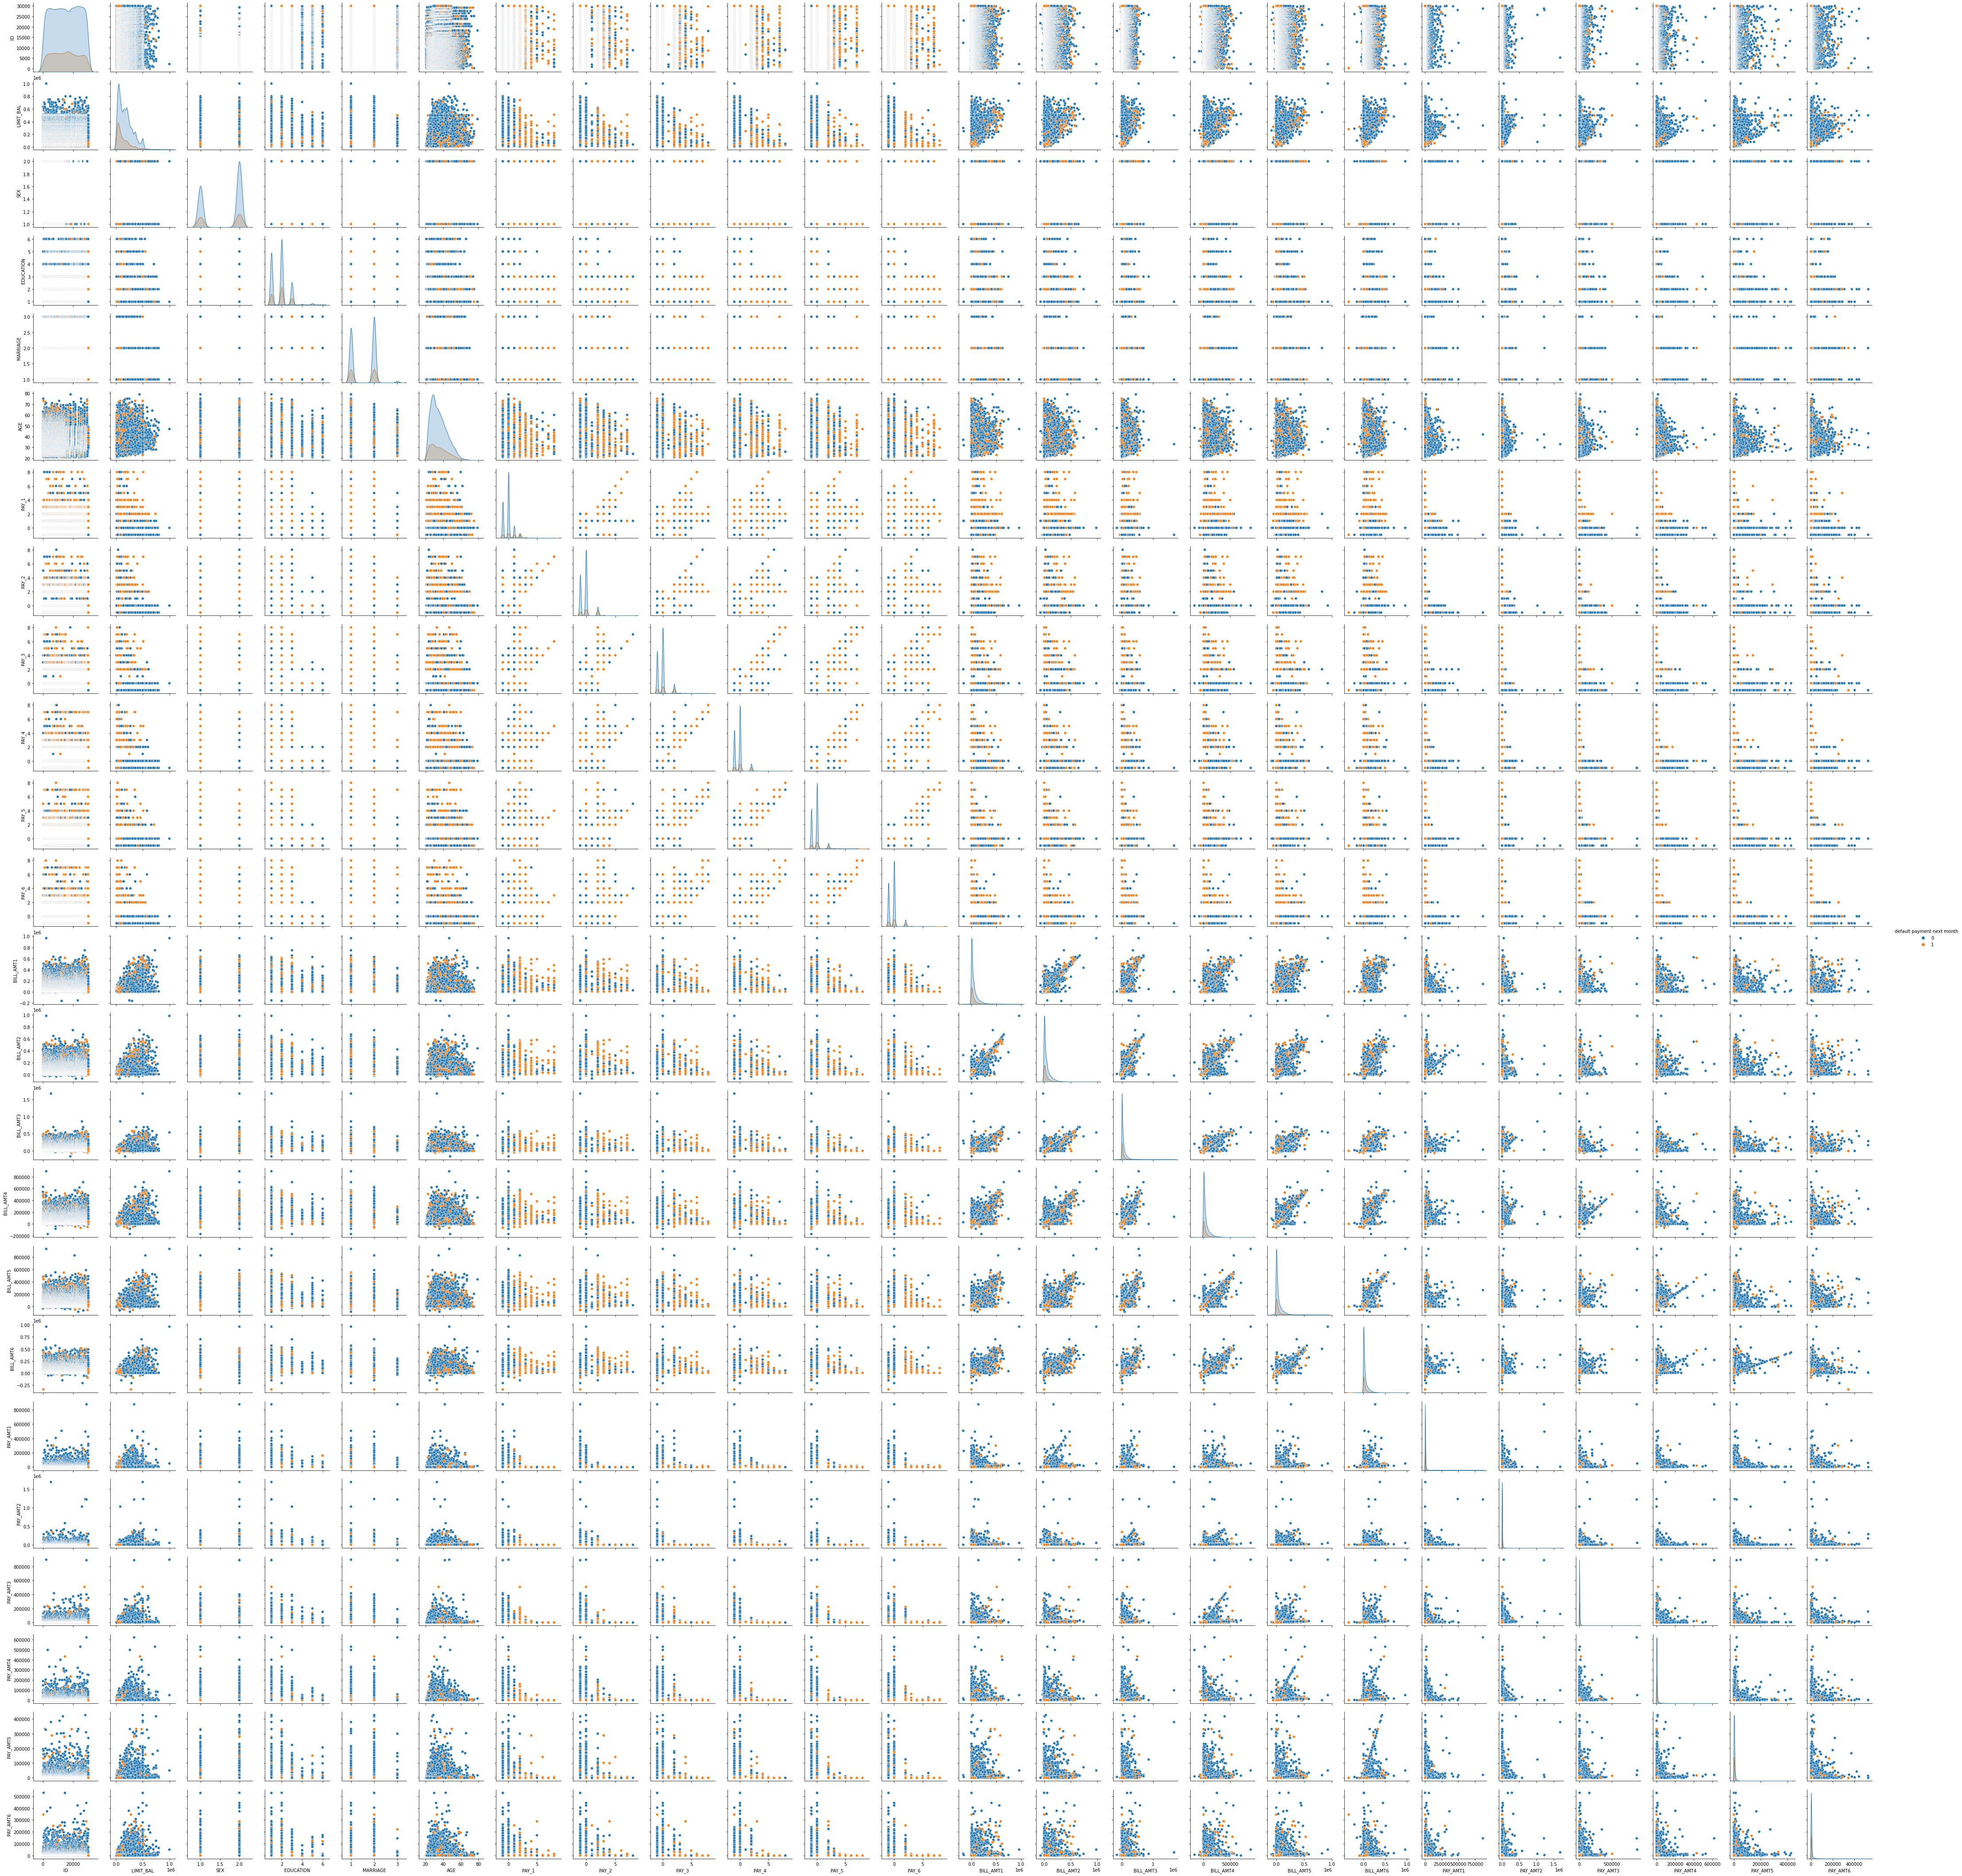

In [ ]:
# Chart - 1 visualization code
sns.pairplot(df,hue='default payment next month')

Answer Here.

---



**Renaming columns**

In [9]:
df.rename(columns={'default payment next month':'Defaulter','AGE':'Age','LIMIT_BAL':'Limit_bal','SEX':'Sex','EDUCATION':'Education','MARRIAGE':'Marriage','PAY_1':'Pay_1','PAY_5':'Pay_5','PAY_6':'Pay_6','PAY_2':'Pay_2','PAY_3':'Pay_3','PAY_4':'Pay_4','BILL_AMT1':'Bill_amt1','BILL_AMT2':'Bill_amt2','BILL_AMT3':'Bill_amt3','BILL_AMT4':'Bill_amt4','BILL_AMT5':'Bill_amt5','BILL_AMT6':'Bill_amt6','PAY_AMT1':'Pay_amt1','PAY_AMT2':'Pay_amt2','PAY_AMT3':'Pay_amt3','PAY_AMT4':'Pay_amt4','PAY_AMT5':'Pay_amt5','PAY_AMT6':'Pay_amt6'},inplace=True)


**Plotting each independent variable with dependent variable**

Limit balance vs Defaulter

<Axes: xlabel='Defaulter', ylabel='Limit_bal'>

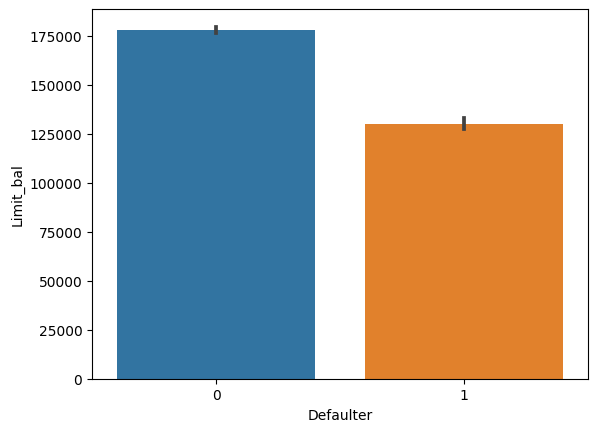

In [ ]:
sns.barplot(y=df['Limit_bal'],x=df['Defaulter'])


Generally, Non defaulters have high limit balance with mean around 175000 and defaulter around 125000

In [ ]:
df.groupby('Defaulter')['Limit_bal'].mean()

Defaulter
0    177878.88651
1    130109.65642
Name: Limit_bal, dtype: float64

Sex vs defaulter

In [ ]:
cat1=pd.DataFrame(df.groupby(by=['Sex','Defaulter'],as_index=False)['ID'].count())

In [ ]:
cat1

Sex  Defaulter     ID
0    1          0   9015
1    1          1   2873
2    2          0  14349
3    2          1   3763

In [ ]:
df_count1 = cat1.pivot('Sex', 'Defaulter', 'ID').fillna(0).reset_index()
df_count1

Defaulter  Sex      0     1
0            1   9011  2873
1            2  14339  3763

In [ ]:
df_count1.rename(columns={0:'Non Defaulter',1:'Defaulter'},inplace=True)
df_count1

Defaulter  Sex  Non Defaulter  Defaulter
0            1           9011       2873
1            2          14339       3763

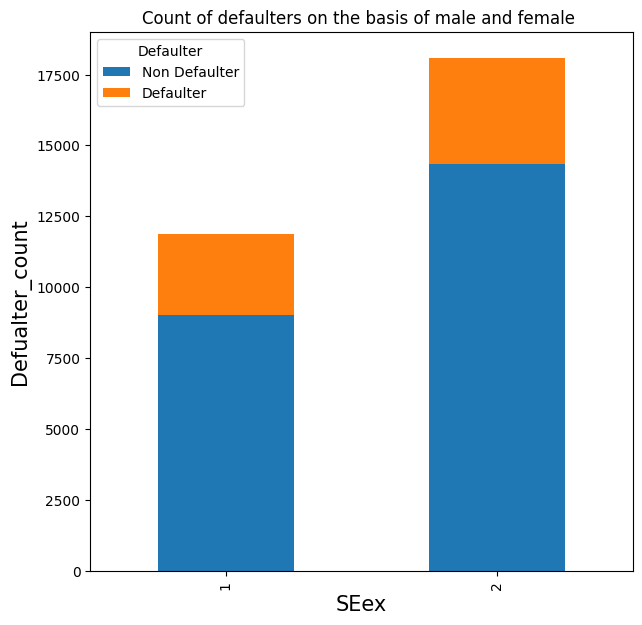

In [ ]:
# Visualizing through stacked bar chart
df_count1.set_index('Sex').plot(kind='bar', stacked=True, figsize=(7,7))
plt.xlabel("SEex", fontsize=15)
plt.ylabel("Defualter_count", fontsize=15)
plt.title("Count of defaulters on the basis of male and female ")
plt.show()

Males has lower no. of deafulters as well as non defaulters compared to females and I had used statcked chart for this because this made the easy and comparative visualization of no. of defaulters and non defaulters for sex categories as male and female.

In [10]:
df2=pd.DataFrame(df.groupby(['Education'])['Defaulter'].value_counts())
#df2.pivot(['EDUCATION','Defaulter'])
df2.rename(columns={'Defaulter':'Count'},inplace=True)
df2.reset_index(inplace=True)
df3=df2.pivot('Education','Defaulter','Count').fillna(0).reset_index()
df3

Defaulter  Education      0     1
0                  1   8541  2036
1                  2  10697  3330
2                  3   3677  1237
3                  4    116     7
4                  5    262    18
5                  6     57     8

<BarContainer object of 6 artists>

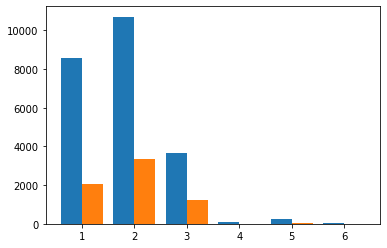

In [ ]:
plt.bar(df3['Education']-0.2,df3[0],width=0.40)
plt.bar(df3['Education']+0.2,df3[1],width=0.40)

Highest population is from Graduation with maximum no. of defaulters compared to other educational categories.

In [ ]:
df4=pd.DataFrame(df.groupby(['Marriage'])['Defaulter'].value_counts())
#df2.pivot(['EDUCATION','Defaulter'])
df4.rename(columns={'Defaulter':'Count'},inplace=True)
df4.reset_index(inplace=True)
df5=df4.pivot('Marriage','Defaulter','Count').fillna(0).reset_index()
df5

Defaulter  Marriage      0     1
0                 0     49     5
1                 1  10453  3206
2                 2  12623  3341
3                 3    239    84

<BarContainer object of 4 artists>

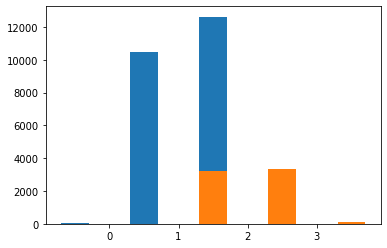

In [ ]:
plt.bar(df5['Marriage']-0.5,df5[0],width=0.40)
plt.bar(df5['Marriage']+.5,df5[1],width=0.40)

<Axes: xlabel='AGE'>

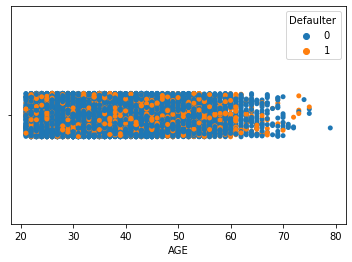

In [ ]:
sns.stripplot(data=df,x='Age',hue='Defaulter')

Higher age groups have lowest no. of defaulters.

<Axes: xlabel='index', ylabel='Age'>

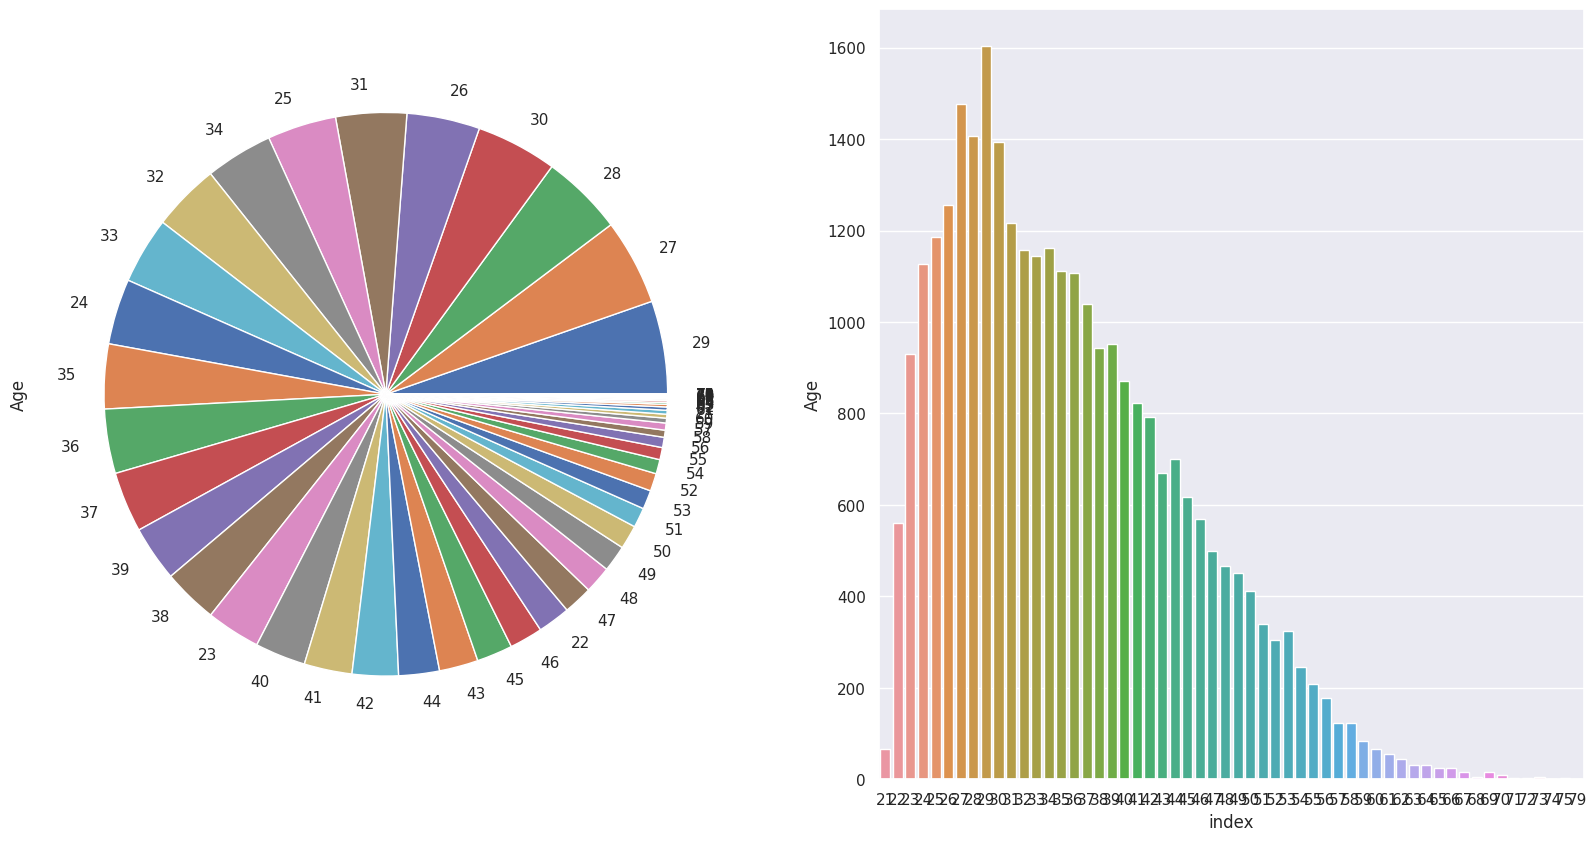

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(20,10))
Day_df=df['Age'].value_counts().reset_index()
df['Age'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='Age',data=Day_df,ax = axes[1],orient='v')

Maximum no. of people belongs to age group 27-29.

In [ ]:
df.drop('ID',axis=1,inplace=True)


**Correlation plot**

<Axes: >

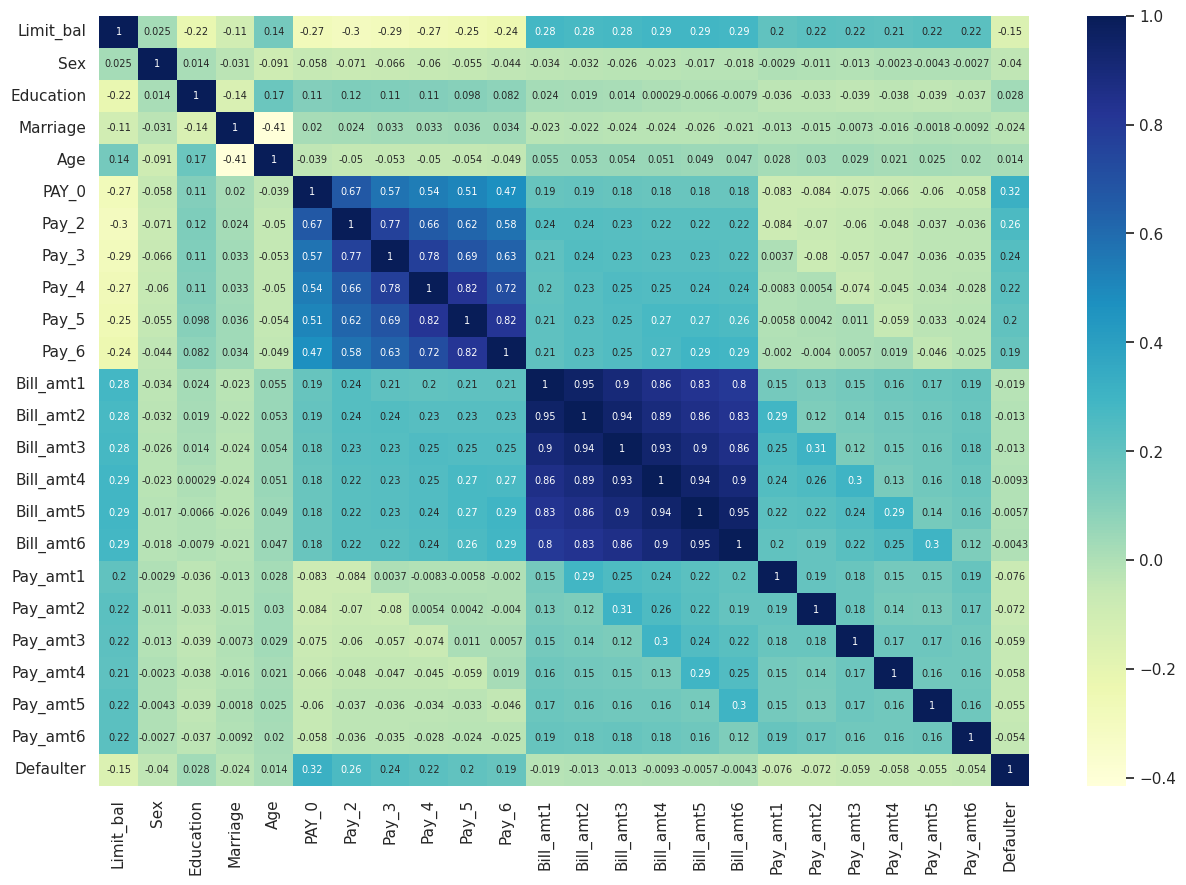

In [ ]:
# Chart - 2 visualization code
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True,annot_kws={"size": 7})

From the above heatmap we can conclude that all the 6 payments are related to each other as well as all the 6 bill amount are related to each other.

Insights with respect to dependent variable "Defaulter"

Limit balance has negative effect on defaulter

Payment has effect on being defaulter



In [ ]:
features = df.drop('Defaulter', axis = 1, inplace = False)

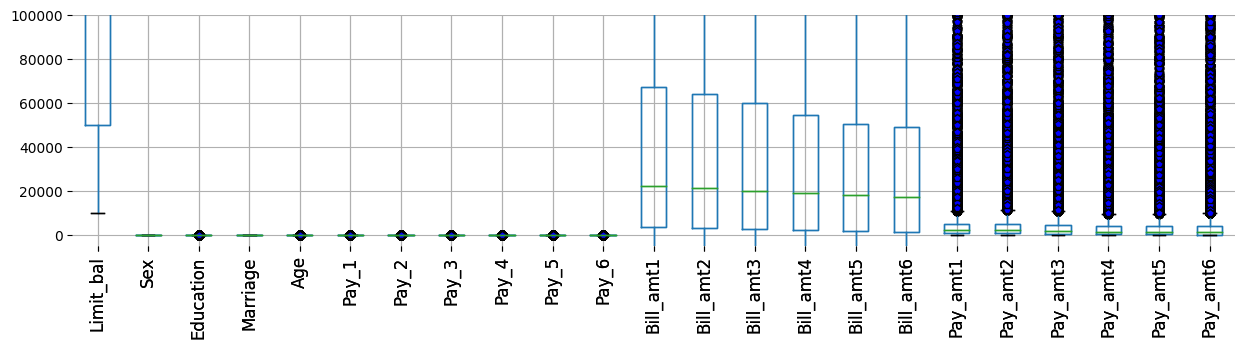

In [ ]:
## data are distributed in a wide range (below), need to be normalizded.
plt.figure(figsize=(15,3))
ax= df.drop('Defaulter', axis=1).boxplot(df.columns.name, rot=90)
outliers = dict(markerfacecolor='b', marker='p')
ax= features.boxplot(features.columns.name, rot=90, flierprops=outliers)
plt.xticks(size=12)
ax.set_ylim([-5000,100000])
plt.box(False);

In [ ]:
y=df.Defaulter

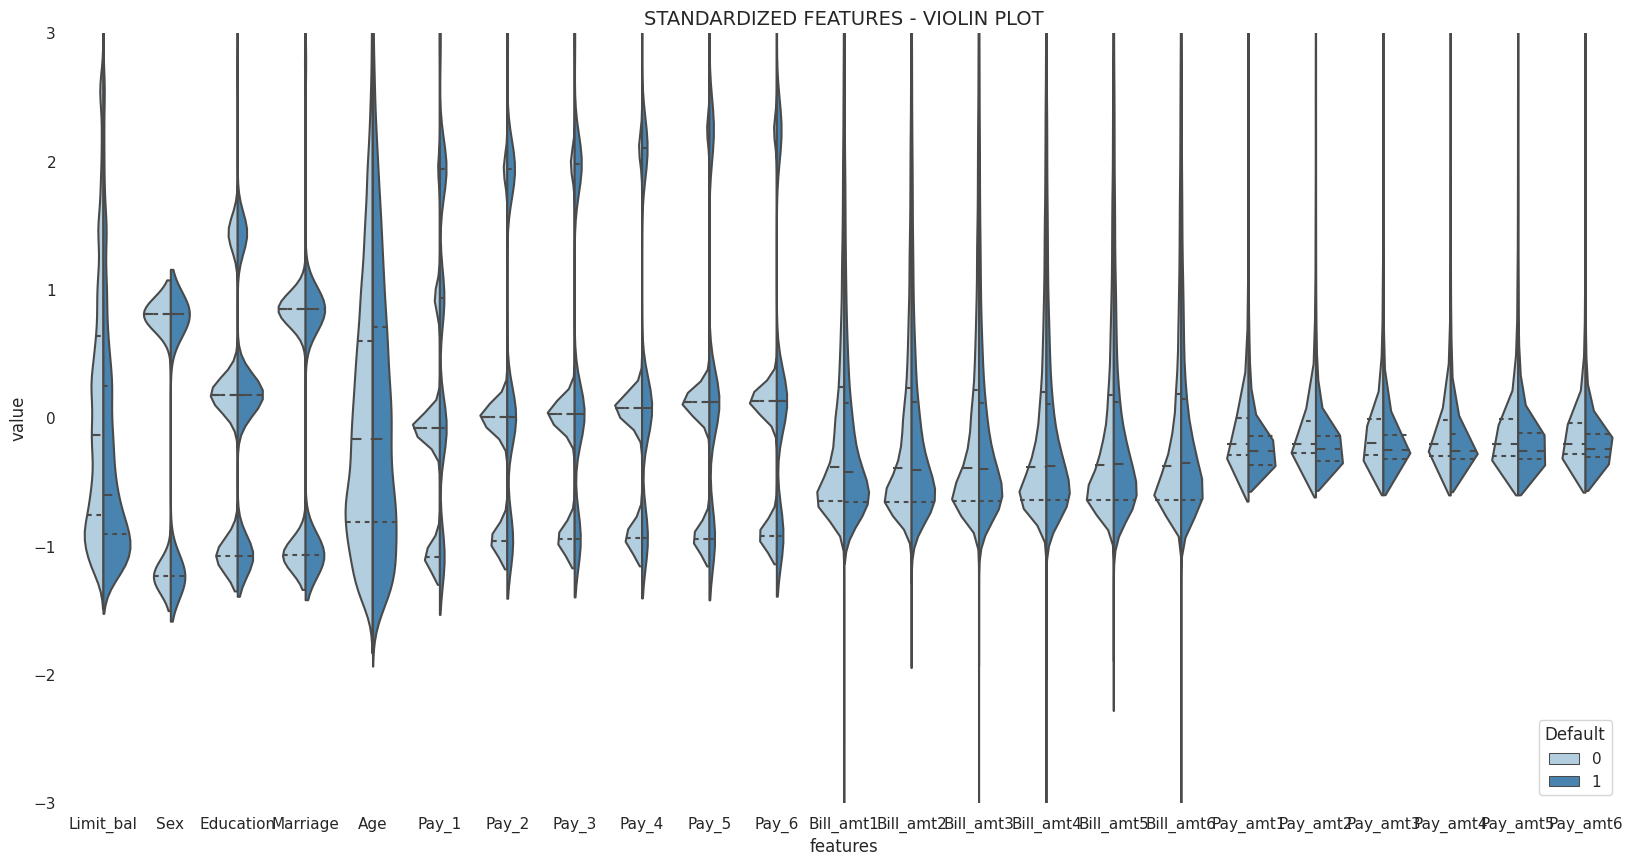

In [ ]:
stdX = (features - features.mean()) / (features.std())              # standardization
data_st = pd.concat([y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="Defaulter",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.set_context('notebook', font_scale=1)
sns.violinplot(y="value", x="features", hue="Defaulter", data=data_st,split=True, 
               inner="quart", palette='Blues')
plt.legend(loc=4, title= 'Default', facecolor='white')
plt.ylim([-3,3])
plt.title('STANDARDIZED FEATURES - VIOLIN PLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=False);


In [ ]:
data_st

Defaulter   features     value
0               1  Limit_bal -1.136701
1               1  Limit_bal -0.365974
2               0  Limit_bal -0.597192
3               0  Limit_bal -0.905483
4               0  Limit_bal -0.905483
...           ...        ...       ...
689995          0   Pay_amt6 -0.237126
689996          0   Pay_amt6 -0.293377
689997          1   Pay_amt6 -0.118999
689998          1   Pay_amt6 -0.191900
689999          1   Pay_amt6 -0.237126

[690000 rows x 3 columns]

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Limit_bal    0
Sex          0
Education    0
Marriage     0
Age          0
Pay_1        0
Pay_2        0
Pay_3        0
Pay_4        0
Pay_5        0
Pay_6        0
Bill_amt1    0
Bill_amt2    0
Bill_amt3    0
Bill_amt4    0
Bill_amt5    0
Bill_amt6    0
Pay_amt1     0
Pay_amt2     0
Pay_amt3     0
Pay_amt4     0
Pay_amt5     0
Pay_amt6     0
Defaulter    0
dtype: int64

Hurrayyyyyyyy!!!!!!!!!!

This shows that none of the column contain null value so we are free from dealing null value treatment problem.

**Hypothesis testing**

Hypothesis 1

Null Hypothesis: Gender has no significant difference on commiting deafault on credit card.

Alternative Hypothesis: Gender has significant difference on commiting deafault on credit card.



---



Hypothesis 2

Null Hypothesis: Education has no significant difference on commiting deafault on credit card.

Alternative Hypothesis: Education has significant difference on commiting deafault on credit card.

In [ ]:
def ChiSquaredTestOfIndependence( df, inputVar, Outcome_Category ):
    # Useful to have this wrapped in a function
    # The ChiSquaredTest of Independence - 
    # has a null hypothesis: the OutcomeCategory is independent of the inputVar
    # So we create a test-statistic which is a measure of the difference between 
    # "expected" i.e. what we WOULD observe if the OutcomeCategory WAS independent of the inputVar
    # "observed" i.e. what the data actually shows
    # the p-value returned is the probability of seeing this test-statistic if the null-hypothesis is true
    Outcome_Category_Table = df.groupby( Outcome_Category )[ Outcome_Category ].count().values
    Outcome_Category_Ratios = Outcome_Category_Table / sum( Outcome_Category_Table )
    possibleVals = df[inputVar].unique()
    observed = []
    expected = []
    for possible in possibleVals:
        countsInCategories = df[ df[ inputVar ] == possible ].groupby( Outcome_Category )[Outcome_Category].count().values
        if( len(countsInCategories) != len( Outcome_Category_Ratios ) ):
            print("Error! The class " + str( possible) +" of \'" + inputVar + "\' does not contain all values of \'" + Outcome_Category + "\'" )
            return
        elif( min(countsInCategories) < 5 ):
            print("Chi Squared Test needs at least 5 observations in each cell!")
            print( inputVar + "=" + str(possible) + " has insufficient data")
            print( countsInCategories )
            return
        else:
            observed.append( countsInCategories )   
            expected.append( Outcome_Category_Ratios * len( df[df[ inputVar ] == possible ]))
    observed = np.array( observed )
    expected = np.array( expected )
    chi_squared_stat = ((observed - expected)**2 / expected).sum().sum()
    degOfF = (observed.shape[0] - 1 ) *(observed.shape[1] - 1 ) 
    #crit = stats.chi2.ppf(q = 0.95,df = degOfF) 
    p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=degOfF)
    print("Calculated test-statistic is %.2f" % chi_squared_stat )
    print("If " + Outcome_Category + " is indep of " + inputVar + ", this has prob %.2e of occurring" % p_value )
    #t_stat, p_val, doF, expArray = stats.chi2_contingency(observed= observed, correction=False)
    #print("Using built-in stats test: outputs")
    #print("test-statistic=%.2f, p-value=%.2f, degsOfFreedom=%d" % ( t_stat, p_val, doF ) )


In [ ]:
import scipy.stats as stats
ChiSquaredTestOfIndependence( df, 'Sex', 'Defaulter' )

Calculated test-statistic is 47.77
If Defaulter is indep of Sex, this has prob 4.78e-12 of occurring


Since, p value is less than 0.05 so we can reject null hypothesis and conclude that there is significant difference of gender on being defaulter and non defaulter.

In [ ]:
ChiSquaredTestOfIndependence( df, 'Education', 'Defaulter' )

Calculated test-statistic is 161.42
If Defaulter is indep of Education, this has prob 0.00e+00 of occurring


Since, p value is less than 0.05 so we can reject null hypothesis and conclude that there is significant difference of education on being defaulter and non defaulter.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns 
df.select_dtypes(exclude='number')

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[30000 rows x 0 columns]

Since none of the column cotain non numeric value.

So we don't require any categorical encoding technique.


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df.head()

Sex_1  Sex_2  Education_1  Education_2  Education_3  Education_4  \
0      0      1            0            1            0            0   
1      0      1            0            1            0            0   
2      0      1            0            1            0            0   
3      0      1            0            1            0            0   
4      1      0            0            1            0            0   

   Education_5  Education_6  Marriage_1  Marriage_2  ...  Bill_amt4  \
0            0            0           1           0  ...          0   
1            0            0           0           1  ...       3272   
2            0            0           0           1  ...      14331   
3            0            0           1           0  ...      28314   
4            0            0           1           0  ...      20940   

   Bill_amt5  Bill_amt6  Pay_amt1  Pay_amt2  Pay_amt3  Pay_amt4  Pay_amt5  \
0          0          0         0       689         0         0         0   
1       3455       3261         0      1000      1000      1000         0   
2      14948      15549      1518      1500      1000      1000      1000   
3      28959      29547      2000      2019      1200      1100      1069   
4      19146      19131      2000     36681     10000      9000       689   

   Pay_amt6  Defaulter  
0         0          1  
1      2000          1  
2      5000          0  
3      1000          0  
4       679          0  

[5 rows x 32 columns]

#### 2. Feature Selection

In [13]:
df1=df

In [14]:
# Select your features wisely to avoid overfitting   
for att in ['Sex', 'Education', 'Marriage']:
  df[att] = df[att].astype('category')

# one-hot encoding
df1=pd.concat([pd.get_dummies(df1['Sex'], prefix='Sex'),
                pd.get_dummies(df1['Education'], prefix='Education'), 
                pd.get_dummies(df1['Marriage'], prefix='Marriage'),
                df1],axis=1)
# drop original columns
df1.drop(['Education'],axis=1, inplace=True)
df1.drop(['Sex'],axis=1, inplace=True)
df1.drop(['Marriage'],axis=1, inplace=True)
df1.head()
df1.columns

Index(['Sex_1', 'Sex_2', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Education_5', 'Education_6', 'Marriage_1', 'Marriage_2',
       'Marriage_3', 'ID', 'Limit_bal', 'Age', 'Pay_1', 'Pay_2', 'Pay_3',
       'Pay_4', 'Pay_5', 'Pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3',
       'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'Pay_amt1', 'Pay_amt2',
       'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6', 'Defaulter'],
      dtype='object')

In [15]:
col=set(df1.columns.values)-{"Defaulter",'Education_1',
 'Education_2',
 'Education_3',
 'Education_4',
 'Education_5',
 'Education_6','Marriage_1',
 'Marriage_2',
 'Marriage_3','Sex_1',
 'Sex_2'}
col
df2=df1.drop(columns={"Defaulter",'Education_1',
 'Education_2',
 'Education_3',
 'Education_4',
 'Education_5',
 'Education_6','Marriage_1',
 'Marriage_2',
 'Marriage_3','Sex_1',
 'Sex_2'}) 

In [16]:
from  sklearn.feature_selection import VarianceThreshold
var_thres= VarianceThreshold(threshold=0.05)
var_thres.fit(df1[col])
useless_col=[col for result in var_thres.get_support()if result!=True]
useless_col


[]

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)          

In [ ]:
calc_vif(df[[i for i in col]])

variables        VIF
0   Bill_amt5  37.121597
1   Bill_amt1  21.361602
2    Pay_amt5   1.878660
3       Pay_3   2.975681
4          ID   3.475890
5       Pay_6   2.796338
6    Pay_amt2   2.016326
7   Bill_amt6  22.016164
8    Pay_amt4   1.782373
9    Pay_amt1   1.823961
10  Bill_amt4  31.885226
11      Pay_4   3.498280
12  Limit_bal   3.769590
13  Bill_amt2  40.422720
14      Pay_1   1.905829
15        Age   4.898729
16      Pay_5   3.837809
17  Bill_amt3  34.927292
18      Pay_2   2.785925
19   Pay_amt3   1.863248
20   Pay_amt6   1.278875

From above table we can infer that feature bill amount has VIF>10.
Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6 This are the variables leading to multicollinearity problem. So, to overcome this multicolinearity problem we can combine Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6 i.e given for different months from April to September individually to form one feature as monthly average bill generated.

In [18]:
df1['Average monthly bill statement']=(df1['Bill_amt1']+df1['Bill_amt2']+df1['Bill_amt3']+df1['Bill_amt4']+df1['Bill_amt5']+df1['Bill_amt6'])/6
df1.drop(columns={'Bill_amt1','Bill_amt2','Bill_amt3','Bill_amt4','Bill_amt5','Bill_amt6'},axis=1,inplace=True)


In [ ]:
df1.head()

Sex_1  Sex_2  Education_1  Education_2  Education_3  Education_4  \
0      0      1            0            1            0            0   
1      0      1            0            1            0            0   
2      0      1            0            1            0            0   
3      0      1            0            1            0            0   
4      1      0            0            1            0            0   

   Education_5  Education_6  Marriage_1  Marriage_2  ...  Pay_5  Pay_6  \
0            0            0           1           0  ...     -1     -1   
1            0            0           0           1  ...      0      2   
2            0            0           0           1  ...      0      0   
3            0            0           1           0  ...      0      0   
4            0            0           1           0  ...      0      0   

   Pay_amt1  Pay_amt2  Pay_amt3  Pay_amt4  Pay_amt5  Pay_amt6  Defaulter  \
0         0       689         0         0         0         0          1   
1         0      1000      1000      1000         0      2000          1   
2      1518      1500      1000      1000      1000      5000          0   
3      2000      2019      1200      1100      1069      1000          0   
4      2000     36681     10000      9000       689       679          0   

   Average monthly bill statement  
0                     1284.000000  
1                     2846.166667  
2                    16942.166667  
3                    38555.666667  
4                    18223.166667  

[5 rows x 28 columns]

In [19]:
col=set(df1.columns)-{'Default',
 'Education_1',
 'Education_2',
 'Education_3',
 'Education_4',
 'Education_5',
 'Education_6','Marriage_1',
 'Marriage_2',
 'Marriage_3','Sex_1',
 'Sex_2'}
col 

{'Age',
 'Average monthly bill statement',
 'Defaulter',
 'ID',
 'Limit_bal',
 'Pay_1',
 'Pay_2',
 'Pay_3',
 'Pay_4',
 'Pay_5',
 'Pay_6',
 'Pay_amt1',
 'Pay_amt2',
 'Pay_amt3',
 'Pay_amt4',
 'Pay_amt5',
 'Pay_amt6'}

In [20]:
calc_vif(df1[[i for i in col]])

variables       VIF
0                            Pay_1  1.986110
1                            Pay_5  3.826805
2                        Defaulter  1.476991
3                         Pay_amt6  1.216851
4                         Pay_amt1  1.310307
5                               ID  3.461959
6                            Pay_2  2.779383
7                         Pay_amt3  1.271710
8                         Pay_amt2  1.272018
9                         Pay_amt5  1.229607
10                        Pay_amt4  1.244891
11                             Age  5.181761
12                           Pay_3  2.968829
13                           Pay_4  3.490074
14                           Pay_6  2.756543
15  Average monthly bill statement  2.145608
16                       Limit_bal  3.753769

In [21]:
y=df1['Defaulter']
X=pd.DataFrame(df1.drop('Defaulter',axis=1,inplace=False))

In [22]:
print(X.shape)
print("Number of samples",X.shape[0])
print("Number of attributes",X.shape[1])      

(29986, 27)
Number of samples 29986
Number of attributes 27


### 8. Data Splitting

In [23]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22489, 27), (7497, 27), (22489,), (7497,))

##### What data splitting ratio have you used and why? 

Splitting ratio used is 75%-25%
Traing dataset contains 75% of the total data while testing dataset contains 25% of the total data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
a=len(df1[df1['Defaulter']==0])
b=len(df1[df1['Defaulter']==1])
c=len(df1['Defaulter'])
d=(a/c)*100
e=(b/c)*100
print("Non defaulter's percentage is ",d)
print("Defaulter's percentage is",e)

Non defaulter's percentage is  77.86967251383979
Defaulter's percentage is 22.13032748616021


This shows that the dataset is imbalance is time to apply techniques to balance the dataset.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

In [24]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
#import SMOTE from imblearn library
#!pip install imblearn\

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 4977
Before OverSampling, counts of label '0': 17512 

After OverSampling, the shape of train_X: (35024, 27)
After OverSampling, the shape of train_y: (35024,) 

After OverSampling, counts of label '1': 17512
After OverSampling, counts of label '0': 17512


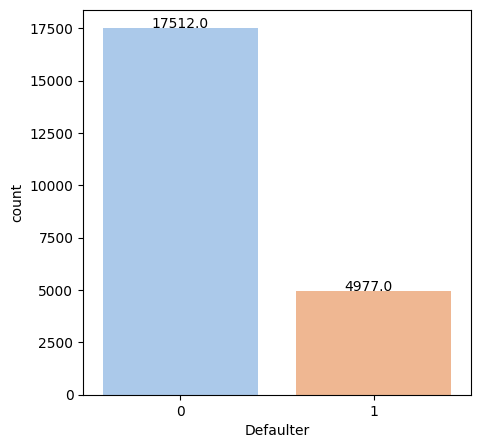

In [25]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=y_train,palette='pastel')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

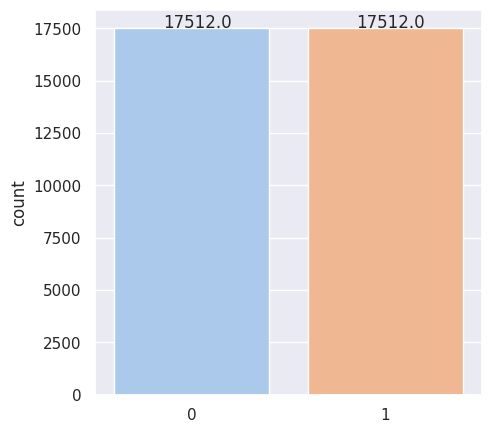

In [ ]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=y_train_res,palette='pastel')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

This count plots are visually helping us to have a look on balanced class for training dataset.

Initially, our training dataset contains 17512 records from majority class while 4977 from minority class.So to balance such imbalanced dataset I had used SMOTE technique of oversampling which had generated synthetically minority class data and after using this oversampling technique training dataset contains equal records i.e. 17512 from both the classes. Thus this has converted by imbalanced dataset to balanced one.

## ***7. ML Model Implementation***

### ML Model - 1

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, roc_auc_score
# from sklearn.metrics import roc_auc_ovr
# from sklearn.metrics import roc_auc_ovo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier


In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

### ML Model - 1 Logistic Regression

In [27]:
# ML Model - 1 Implementation
lr = LogisticRegression(fit_intercept=True,
            class_weight='balanced')
# Fit the Algorithm
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [28]:
# Checking the coefficients
lr.coef_

array([[ 3.20854786e-04,  2.32321891e-05,  7.34089662e-05,
         2.10840888e-04,  1.08351350e-04, -1.16897550e-05,
        -3.23688297e-05, -4.45564480e-06,  3.24096429e-04,
         1.35343181e-05,  6.45622716e-06, -1.44976823e-06,
        -2.90959111e-06,  1.48256575e-02,  2.74097026e-03,
         2.16519699e-03,  1.91629848e-03,  1.72478600e-03,
         1.52585553e-03,  1.40199550e-03, -1.54283418e-05,
        -1.51167245e-05, -5.71415717e-06, -5.17360481e-06,
        -4.74494404e-06, -3.54991835e-06,  3.24943055e-06]])

In [29]:
# Checking the intercept value
lr.intercept_

array([0.00034409])

In [30]:
# Predict on the model
# Get the predicted probabilities
train_probability_lr = lr.predict_proba(X_train)
test_probability_lr = lr.predict_proba(X_test)

In [31]:
test_probability_lr

array([[0.52577266, 0.47422734],
       [0.3663717 , 0.6336283 ],
       [0.56020766, 0.43979234],
       ...,
       [0.6113214 , 0.3886786 ],
       [0.49348476, 0.50651524],
       [0.42843566, 0.57156434]])

In [32]:
# Get the predicted classes
y_pred_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)

In [33]:
#define a function which print the result of Evaluation metrics.
def print_metrics(actual_train,actual_test,predicted_train,predicted_test):
  labels=[0,1]

  print('Training accuracy {}'.format(accuracy_score(actual_train,predicted_train)))
  print('Testing accuracy {}'.format(accuracy_score(actual_test,predicted_test)))
  print('---'*75)
  print('Precision  {}'.format(precision_score(actual_test,predicted_test,average='weighted')))
  print('Recall  {}'.format(recall_score(actual_test,predicted_test,average='weighted')))
  print('f1 Score on test data is {}'.format(f1_score(actual_test,predicted_test,average='weighted')))
  #print('roc_auc_score on test data is {}'.format(roc_auc_score(actual_test, test_probability,average='weighted')))
  print('---'*75)

  cm_=confusion_matrix(actual_train,predicted_train)
  print(cm_)
  sns.set(rc={'figure.figsize':(4,3)})
  ax= plt.subplot()
  
  sns.heatmap(cm_, annot=True, ax = ax) #annot=True to annotate cells
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix for training dataset')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels) 
  plt.show()
  print('---'*100)

  cm=confusion_matrix(actual_test,predicted_test)
  print(cm)

  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix for testing dataset')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels) 
  plt.show()

  

Training accuracy 0.5496464938414336
Testing accuracy 0.5506202480992397
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Precision  0.7406617346398481
Recall  0.5506202480992397
f1 Score on test data is 0.5861239066356096
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[8777 8735]
 [1393 3584]]


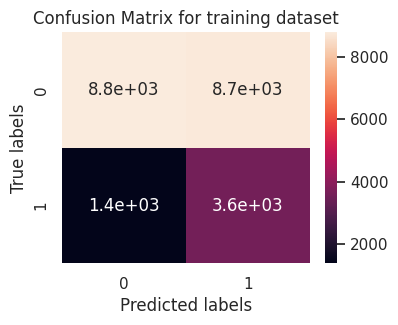

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[2913 2925]
 [ 444 1215]]


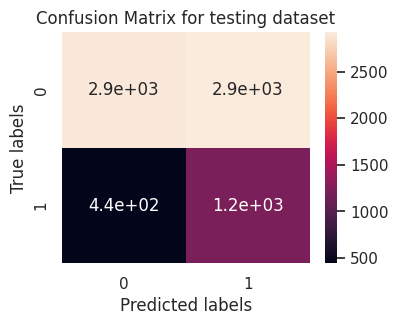

In [34]:
print_metrics(y_train,y_test,y_pred_train_lr,y_pred_lr)

#### 2. Cross- Validation & Hyperparameter Tuning

In [35]:
# ML Model - 1 Implementation with hyperparameter optimization techniques.
model = LogisticRegression(fit_intercept=True, max_iter=10000,
            class_weight='balanced')
solvers = ['lbfgs']
penalty = ['l2']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.718906 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [36]:
# Predict on the model
# Get the predicted probabilities
train_probability_lrh = grid_result.predict_proba(X_train)
test_probability_lrh = grid_result.predict_proba(X_test)

In [37]:
# Predict on the model
# Get the predicted classes
y_pred_train_lrh = grid_result.predict(X_train)
y_pred_lrh = grid_result.predict(X_test)

Training accuracy 0.5496464938414336
Testing accuracy 0.5506202480992397
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Precision  0.7406617346398481
Recall  0.5506202480992397
f1 Score on test data is 0.5861239066356096
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[8777 8735]
 [1393 3584]]


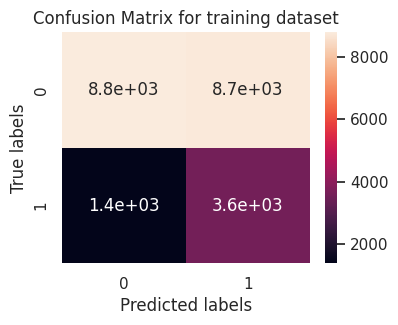

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[2913 2925]
 [ 444 1215]]


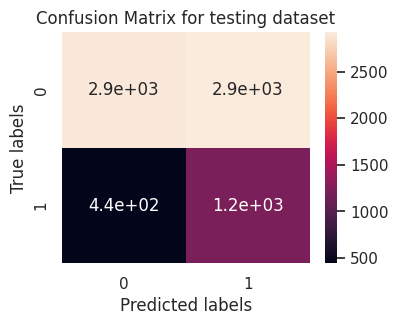

In [38]:
print_metrics(y_train,y_test,y_pred_train_lrh,y_pred_lrh)

##### Which hyperparameter optimization technique have you used and why?

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [40]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [41]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

### ML Model - 2 Random Forest Classifier

In [44]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
# Predict on the model
# Making predictions on train and test data
y_pred_train_rf = rf_model.predict(X_train)
y_pred_rf = rf_model.predict(X_test)

In [46]:
# Predict on the model
# Get the predicted probabilities
train_probability_rf = rf_model.predict_proba(X_train)
test_probability_rf = rf_model.predict_proba(X_test)

Training accuracy 1.0
Testing accuracy 0.8187274909963985
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Precision  0.8013266313679884
Recall  0.8187274909963985
f1 Score on test data is 0.7994344101216911
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[17512     0]
 [    0  4977]]


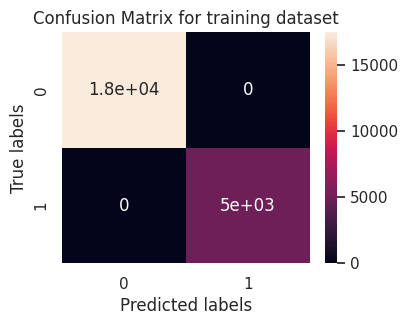

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[5511  327]
 [1032  627]]


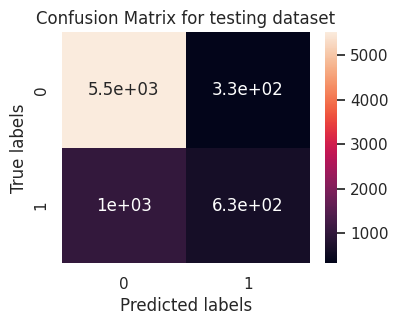

In [47]:
print_metrics(y_train,y_test,y_pred_train_rf,y_pred_rf)

In [48]:
# ML Model - 2 Implementation with hyperparameter optimization techniques
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='f1')


# Fit the Algorithm
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='f1', verbose=2)

In [49]:
#best parameter
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: 0.468004 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 150, 'n_estimators': 100}


In [50]:
# Predict on the model
# Making predictions on train and test data
y_pred_train_rfh = rf_grid.predict(X_train)
y_pred_rfh = rf_grid.predict(X_test)

In [51]:
# Predict on the model
# Get the predicted probabilities
train_probability_rfh = rf_grid.predict_proba(X_train)
test_probability_rfh = rf_grid.predict_proba(X_test)

In [ ]:
Best: 0.468004 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 150, 'n_estimators': 100

Training accuracy 0.824669838587754
Testing accuracy 0.8209950646925437
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Precision  0.8045023162070981
Recall  0.8209950646925437
f1 Score on test data is 0.7985382496242569
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[16729   783]
 [ 3160  1817]]


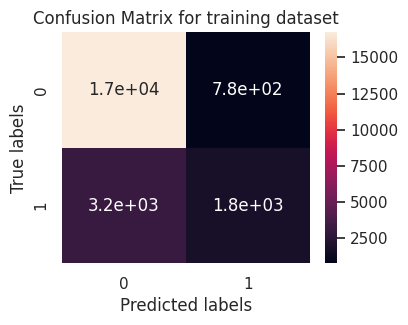

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[5564  274]
 [1068  591]]


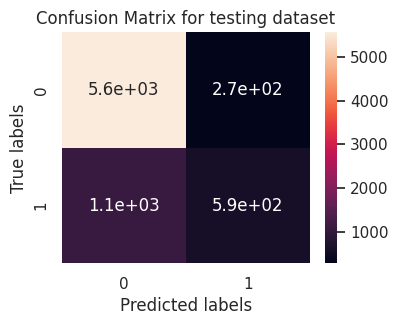

In [52]:
print_metrics(y_train,y_test,y_pred_train_rfh,y_pred_rfh)

### ML Model - 3 XgBoost Classifier

In [53]:
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

In [54]:
# Predict on the model
# Making predictions on train and test data

y_pred_train_xg = xg_models.predict(X_train)
y_pred_xg = xg_models.predict(X_test)

In [55]:
# Predict on the model
# Get the predicted probabilities
train_probability_xg = xg_models.predict_proba(X_train)
test_probability_xg = xg_models.predict_proba(X_test)

In [57]:
y_pred_xg

array([0, 1, 0, ..., 0, 0, 0])

Training accuracy 0.8802081017386277
Testing accuracy 0.8155262104841937
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Precision  0.7971886909615086
Recall  0.8155262104841937
f1 Score on test data is 0.7962686220358511
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[17118   394]
 [ 2300  2677]]


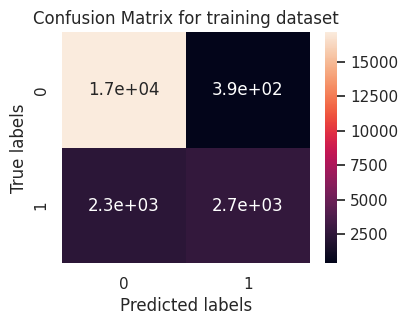

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[5494  344]
 [1039  620]]


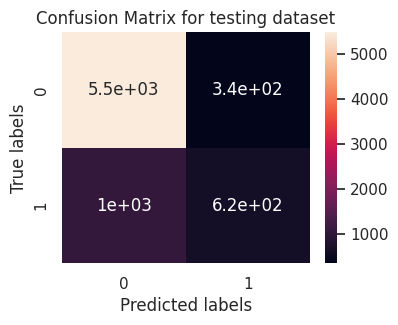

In [58]:
print_metrics(y_train,y_test,y_pred_train_xg,y_pred_xg)

#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 3 Implementation with hyperparameter optimization techniques 
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the XGBClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[17:46:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.3s
[17:46:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.3s
[17:46:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.3s
[17:46:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.3s
[17:46:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_lea

In [60]:
#best parameter
print("Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

Best: 0.775437 using {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50}


In [61]:
# Predict on the model
# Making predictions on train and test data

y_pred_train_xgh = xg_grid1.predict(X_train)
y_pred_xgh = xg_grid1.predict(X_test)

In [62]:
# Predict on the model
# Get the predicted probabilities
train_probability_xgh = xg_grid1.predict_proba(X_train)
test_probability_xgh = xg_grid1.predict_proba(X_test)

Training accuracy 0.8340522032993908
Testing accuracy 0.8188608776844071
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Precision  0.8014180760983829
Recall  0.8188608776844071
f1 Score on test data is 0.7974087347310597
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[16782   730]
 [ 3002  1975]]


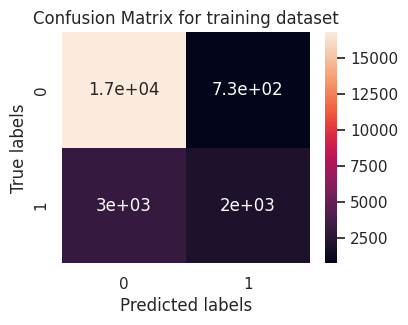

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[5540  298]
 [1060  599]]


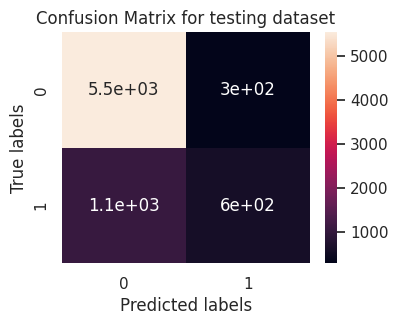

In [63]:
print_metrics(y_train,y_test,y_pred_train_xgh,y_pred_xgh)

### ML Model - 1 : KNN Classifier

Training accuracy 0.8079060874205167
Testing accuracy 0.7596371882086168
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Precision  0.6995043139675879
Recall  0.7596371882086168
f1 Score on test data is 0.7115315384663702
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[16826   686]
 [ 3634  1343]]


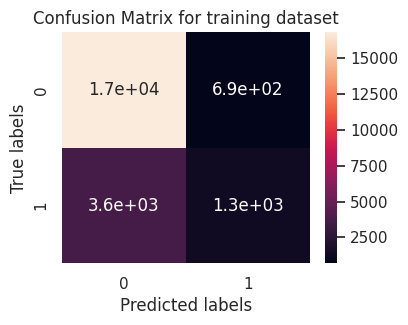

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[5479  359]
 [1443  216]]


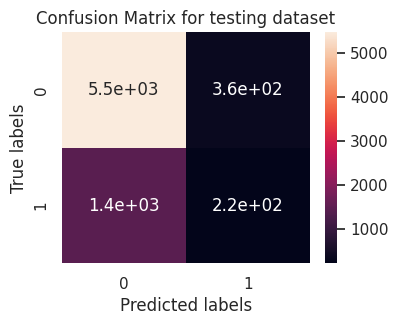

In [71]:
# ML Model - 1 Implementation                                   
#importing KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()

#fit the model 
KNN.fit(X_train,y_train)

#Predict on the model
y_pred_test_KNN = KNN.predict(X_test)
y_pred_train_KNN = KNN.predict(X_train)

#calculating the different scores
print_metrics(y_train,y_test,y_pred_train_KNN,y_pred_test_KNN)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Create 3 folds
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

# Define hyperparameters
parameters = [{'n_neighbors': np.arange(3,50), 'weights': ['uniform','distance']}]

# Search for best hyperparameters
grid_knn = GridSearchCV(estimator=KNN, param_grid=parameters, cv=kfold, scoring='accuracy')

# Fit the Algorithm
grid_knn.fit(X_train,y_train)
#knn=grid_knn.best_estimator_

# Get the results
print(grid_knn.best_score_)
print(grid_knn.best_estimator_)
print(grid_knn.best_params_)

0.5193601806372429
KNeighborsClassifier(n_neighbors=48)
{'n_neighbors': 48, 'weights': 'uniform'}


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Train Accuracy :  0.576875
Test Accuracy : 0.575
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The precision on test dataset is 0.5954978609597178
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The recall on test dataset is 0.575
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Classification Report:

              precision    recall

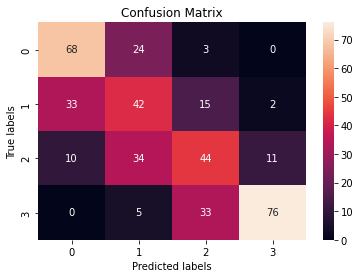

In [ ]:
#fitting with best parameters
knn=grid_knn.best_estimator_

#Predict on the model
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

#calculating the different scores 
tuned_score=score_matrix('KNN',y_test,y_pred_test,y_pred_train)

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

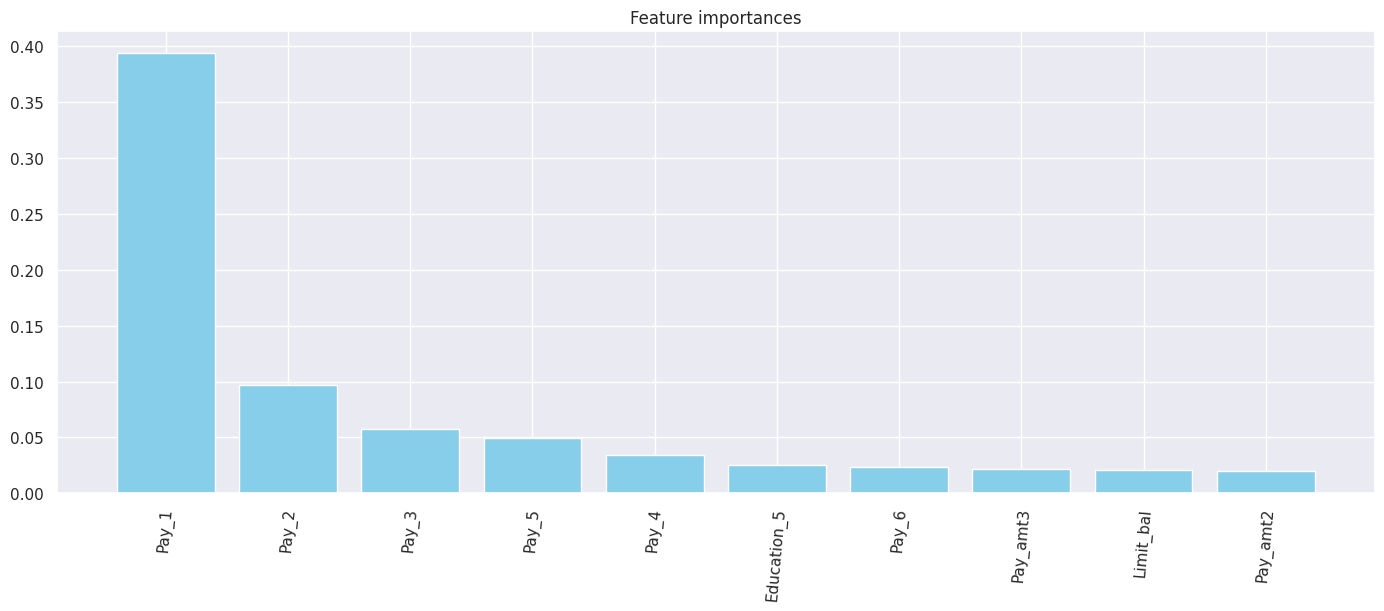

In [67]:
#Feature Importance
feature_importances_xg = pd.DataFrame(xg_models.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance_xg']).sort_values('importance_xg',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xg.index, feature_importances_xg['importance_xg'],
        color="skyblue",  align="center")
plt.xticks(feature_importances_xg.index, rotation = 85)

plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***